In [3]:
%matplotlib widget

import sys
import os

#sys.path.insert(1, os.path.join(sys.path[0], '..'))

from datetime import datetime, timedelta
from pathlib import Path

import sys
sys.path.insert(1, os.path.join(sys.path[0], '/scratch/repos/iis_data_analysis'))

import copy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import json

import warnings

from loader import Loader
lo = Loader()

from analyzer import Analyzer

from utils import _parse_template, save_figures

# Load Files 

In [4]:
json_timestamp_fnct = lambda x: datetime.strptime(x, '%Y%m%dT%H%M%S')
#json_timestamp_fnct = lambda x: datetime.strptime(x, '%Y%m%d_%H%M%S')
#csv_timestamp_fnct = lambda x: datetime.strptime(x, '%d.%m.%Y %H_%M_%S')
csv_timestamp_fnct = lambda x: datetime.strptime(x, '%m_%d_%Y %I_%M_%S %p')
h5_timestamp_fnct = lambda x: datetime.strptime(x, '%Y%m%d_%H%M%S')

parse_timestamp = True

attr_pattern_specs = {}
if parse_timestamp:
    attr_pattern_specs = {'timestamp':{'start':['^', '; ', '^'],
                                       'end':['_[^0-9]', ']', '_[^0-9]'],
                                       'trans_fnct': [json_timestamp_fnct, csv_timestamp_fnct, h5_timestamp_fnct],
                                       'must_contain': ['.json', '.csv', '.h5']
                                       }
                         }


In [5]:
# ============================= User input =============================
# Directory containing the measurement files

root = Path(r'/baltic/users/optolabdata/Experiments/ChristophWeilenmann')
#root = Path(r'Z:/Experiments/ChristophWeilenmann')

directory = root / Path(r'2024-04-23_cleansweep_5_before_anneal/')
directory = root / Path(r'2024-05-02_cleansweep_5_before_anneal_pulses_short_measurement/')
directory = root / Path(r'2024-08-20_cleansweep_8_first_pulses/')
#directory = root / Path(r'2023-07-13_tests')


print(directory)

# Specify a pattern that the filename must contain. Only filenames containing the pattern will be loaded
must_contain = None
#must_contain = '(d1x1|d7x1|d8x1|d2x2|d7x2|d2x3|d2x4|d4x4|d10x4)'
#must_contain = ['P=\w{1,3}_']
#must_contain = '.json'
escape = False                           # must be False if pattern is a regex

# Specify metadata attributes to be read out of filename. 
# The attribute name will be set to the dictionary key (e.g. meas_name)
# The attribute value will be set to the string between the two patterns
user_attr_patterns = {'meas_name': {'start': '_', 'end': '\.'},
                      'chip': {'start': '(cleansweep_\d)', 'end': ''},
                     'cluster': {'start': '(c\d+x\d+)', 'end': '_'},
                     'device': {'start': '(d\d+x\d+)', 'end': '\.'},
                      'ambient':{'start': '(dark|light)', 'end': '_'},
                      'T':{'start': 'T=(\d+)', 'end': ''},
                      'P365':{'start': 'P365=(\d+)', 'end': ''}
                    }


# Example Regex: 'P=\w{1,3}_' (matches patterns: 'P=on_', 'P=0_', 'P=off_', 'P=170')
# Example Regex: 'd\d+x\d+_' (matches pattern: 'd10023x2346_')
# Example Regex: '_(?!(no|UV))' (matches patterns: '_lksjdflj' but not '_no' or '_UV')
# =====================================================================

/baltic/users/optolabdata/Experiments/ChristophWeilenmann/2024-08-20_cleansweep_8_first_pulses


<>:25: SyntaxWarning: invalid escape sequence '\.'
<>:26: SyntaxWarning: invalid escape sequence '\d'
<>:27: SyntaxWarning: invalid escape sequence '\d'
<>:28: SyntaxWarning: invalid escape sequence '\d'
<>:28: SyntaxWarning: invalid escape sequence '\.'
<>:30: SyntaxWarning: invalid escape sequence '\d'
<>:31: SyntaxWarning: invalid escape sequence '\d'
<>:25: SyntaxWarning: invalid escape sequence '\.'
<>:26: SyntaxWarning: invalid escape sequence '\d'
<>:27: SyntaxWarning: invalid escape sequence '\d'
<>:28: SyntaxWarning: invalid escape sequence '\d'
<>:28: SyntaxWarning: invalid escape sequence '\.'
<>:30: SyntaxWarning: invalid escape sequence '\d'
<>:31: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_590131/1235530789.py:25: SyntaxWarning: invalid escape sequence '\.'
  user_attr_patterns = {'meas_name': {'start': '_', 'end': '\.'},
/tmp/ipykernel_590131/1235530789.py:26: SyntaxWarning: invalid escape sequence '\d'
  'chip': {'start': '(cleansweep_\d)', 'end': ''},
/

In [6]:
attr_pattern_specs.update(user_attr_patterns)

lo.load_files(directory, must_contain=must_contain, attr_pattern_specs=attr_pattern_specs, escape=escape)

lo.print_files();

filename  \
0  20240820_172404_AWG_cleansweep_8_c1x1_d1x1_dark_P365=0.2_no_50Ohm_terminator.h5   
1  20240820_172621_AWG_cleansweep_8_c1x1_d1x1_dark_P365=0.2_no_50Ohm_terminator.h5   
2  20240820_172732_AWG_cleansweep_8_c1x1_d1x1_dark_P365=0.2_no_50Ohm_terminator.h5   
3  20240820_172838_AWG_cleansweep_8_c1x1_d1x1_dark_P365=0.2_no_50Ohm_terminator.h5   
4  20240820_173249_AWG_cleansweep_8_c1x1_d1x1_dark_P365=0.2_no_50Ohm_terminator.h5   
5  20240820_175915_AWG_cleansweep_8_c1x1_d1x1_dark_P365=0.2_no_50Ohm_terminator.h5   

            timestamp                                      meas_name  \
0 2024-08-20 17:24:04  172404_AWG_cleansweep_8_c1x1_d1x1_dark_P365=0   
1 2024-08-20 17:26:21  172621_AWG_cleansweep_8_c1x1_d1x1_dark_P365=0   
2 2024-08-20 17:27:32  172732_AWG_cleansweep_8_c1x1_d1x1_dark_P365=0   
3 2024-08-20 17:28:38  172838_AWG_cleansweep_8_c1x1_d1x1_dark_P365=0   
4 2024-08-20 17:32:49  173249_AWG_cleansweep_8_c1x1_d1x1_dark_P365=0   
5 2024-08-20 17:59:15  175915_AWG_cleansweep_8_c1x1_d1x1_dark_P365=0   

           chip cluster device ambient     T P365  
0  cleansweep_8    c1x1   d1x1    dark  None    0  
1  cleansweep_8    c1x1   d1x1    dark  None    0  
2  cleansweep_8    c1x1   d1x1    dark  None    0  
3  cleansweep_8    c1x1   d1x1    dark  None    0  
4  cleansweep_8    c1x1   d1x1    dark  None    0  
5  cleansweep_8    c1x1   d1x1    dark  None    0

## Rename 

In [7]:
# rename_selection_generated = {}
# for i in range(0,47):
#     filename = lo.files[i]['filename']
#     new_filename = filename.replace('d14x4', 'd11x4')
#     #new_filename = new_filename.replace('c1x1', 'c1x4')
#     rename_selection_generated[i] = new_filename
    
# display(rename_selection_generated)


In [8]:
# # ============================= User input ============================= 
# rename_selection = \
# {
#     42: '20220923T150602_cleansweep_4_dark_T=25_c2x1_d4x2.json',
#     43: '20220923T150654_cleansweep_4_dark_T=25_c2x1_d4x2.json',
# }

# rename_selection = rename_selection_generated

# # ====================================================================== 

# lo.rename_files(rename_selection)
# lo.load_files(directory, must_contain=must_contain, attr_pattern_specs=attr_pattern_specs, escape=escape)

# Load Data

In [9]:
lo.load_raw_data()
an = Analyzer(lo, None)

default_meas_type_dict = {'IV': {'x':'Source', 'y':'Current'}, 'RV': {'x':'Source', 'y':'Resistance'},
                          'GV': {'x':'Source', 'y':'Conductance'}, 'JV': {'x':'Source', 'y':'Current Density'}, 
                          'G-t': {'x':'Time', 'y':'Conductance'}, 'J-t': {'x':'Time', 'y':'Current Density'},
                          'V-t': {'x':'Time', 'y':'Voltage'}, 'Source-t': {'x':'Time', 'y':'Source'}, 
                          'I-t': {'x':'Time', 'y':'Current'}, 'R-t': {'x':'Time', 'y':'Resistance'},
                          'P-t': {'x':'Time', 'y':['Power', 'P_avg_rolling', 'P_avg']}, 'ctml': {'x':'S', 'y': ['Resistance', 'R_corr']},
                          'gap_sweep':{'x':'Gap', 'y':'Resistance'}, 'E-t': {'x':'Time', 'y':'Energy'}, 'V_max-G': {'x':'V_max', 'y':'Conductance'}}

an.set_meas_type_dict(default_meas_type_dict)

default_axs_labels = {'Voltage': 'Applied Voltage [V]', 'Source': 'Measured Voltage [V]', 'Time': 'Time [s]', 
                      'Resistance': 'Resistance [ohm]', 'Conductance': 'Conductance [S]', 'Current': 'Current [A]', 
                      'Current Density': 'Current Density [A/cm^2]', 'S': 'gap [um]',
                      'Power': 'Power [W]', 'Gap': 'Gap [um]', 'Energy': 'Energy [J]', 'V_max': 'Pulse Voltage [V]'}

an.set_axs_labels(default_axs_labels)


default_title_template = '{meas_type}: {meas_name}, ({timestamp:%Y-%m-%d %H:%M:%S})'
default_legend_template = '{y_axis}'

default_plot_parameters = {\
                           'plot_type': '',
                           'x_scale':'linear',
                           'y_scale':'linear',
                           'x_lim': (),
                           'y_lim': (),
                           'title_template':default_title_template,
                           'legend_template':default_legend_template,
                           'x_scale_fn': None,
                           'y_scale_fn': None,
                           'plot_settings': {'linewidth': 2},
                           'grid': True,
                          }

# RESET Data 

In [10]:
# selection = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144]

# selection_to_remove = [k for k in an.measurements.keys() if k not in selection]


In [11]:
# for k in selection_to_remove:
#     an.measurements.pop(k, None)

# Clean All Data 

## Remove 0

In [12]:
# Can remove a measurement if no data left
# an.rm_zero(thr=5e-2)

## Set Start Time to 0

In [13]:
all_measurements = list(an.measurements.keys())
selection = an.set_selection(all_measurements) 
value = 0
an.set_start_time_to_value_selection(value)

True

## Calc conductance 

In [14]:
all_measurements = list(an.measurements.keys())
selection = an.set_selection(all_measurements) 
an.calc_conductance(calc_resistance=False, v_app=0, two_channels=False)

True

# Add custom Attributes 

In [15]:
all_measurements = list(an.measurements.keys())
selection = an.set_selection(all_measurements) 
#an.print_measurements(selection=selection)

In [16]:
# ============= Add Voltage at beginning of measurement as attribute ============

attr_map = {}
attr_map['V0'] = []
attr_map['V'] = []
attr_map['V_read'] = []
attr_map['idx'] = []

for idx in selection:
    attr_map['idx'].append(idx)

    data = an.measurements[idx]['data']
    
    try:
        metadata = an.measurements[idx]['metadata']
        attr_map['V'].append(metadata['source_parameters']['AWG-5064']['CH1']['V'])
    except KeyError:
        attr_map['V'].append(None)

    try:
        metadata = an.measurements[idx]['metadata']
        attr_map['V_read'].append(metadata['source_parameters']['AWG-5064']['CH1']['read_V'])
    except KeyError:
        attr_map['V_read'].append(None)
        
    try:
        attr_map['V0'].append(np.round(data['Voltage'].iloc[1], decimals=1)) 
    except IndexError :
        attr_map['V0'].append(None)

        
an.add_attributes_to_selection(attr_map)


True

# Show All Measurements

In [17]:
only_ch2 = [m for m in all_measurements if type(m) is int]
sel = all_measurements
#sel = only_ch2

printed_measurements = an.print_measurements(selection=sel, exclude_keys=['data', 'metadata', 'V', 'V_read'])

timestamp                                      meas_name  \
0 2024-08-20 17:24:04  172404_AWG_cleansweep_8_c1x1_d1x1_dark_P365=0   
1 2024-08-20 17:26:21  172621_AWG_cleansweep_8_c1x1_d1x1_dark_P365=0   
2 2024-08-20 17:27:32  172732_AWG_cleansweep_8_c1x1_d1x1_dark_P365=0   
3 2024-08-20 17:28:38  172838_AWG_cleansweep_8_c1x1_d1x1_dark_P365=0   
4 2024-08-20 17:32:49  173249_AWG_cleansweep_8_c1x1_d1x1_dark_P365=0   
5 2024-08-20 17:59:15  175915_AWG_cleansweep_8_c1x1_d1x1_dark_P365=0   

           chip cluster device ambient     T P365   V0  idx  
0  cleansweep_8    c1x1   d1x1    dark  None    0  0.0    0  
1  cleansweep_8    c1x1   d1x1    dark  None    0  0.0    1  
2  cleansweep_8    c1x1   d1x1    dark  None    0  0.0    2  
3  cleansweep_8    c1x1   d1x1    dark  None    0  0.0    3  
4  cleansweep_8    c1x1   d1x1    dark  None    0  0.0    4  
5  cleansweep_8    c1x1   d1x1    dark  None    0  0.0    5

# Manipulate Selection

In [18]:
# ========== user input ======================
selection_to_manipulate = [5]
print('selection_to_manipulate: ' + str(selection_to_manipulate))
# ============================================

selection_to_manipulate: [5]


In [19]:
if not hasattr(an, 'manipulated_selections'):
    an.manipulated_selections = {}
an.manipulated_selections['normal'] = {k:[k] for k in selection_to_manipulate}

### Pick Points Trigger

In [20]:
sel = selection_to_manipulate
act_on_selections = 'normal'

In [21]:
if not 'triggered_normal_selections' in an.manipulated_selections:
    an.manipulated_selections['triggered_normal_selections'] = {}
    
skip_known = False

In [22]:
# tr_level = {0:0.78, 1:1.18}  # Q:meaning of these values?
tr_level = {0:0.78, 1:1.18, 5:0.48}

n_points_per_pulse = 1
n_points_before_pulse_end = 2
active_edge = 'falling'
fill_above_trigger_level_points = 100

In [23]:
triggered_selections = {}
for s in sel:
    if skip_known and (s in an.manipulated_selections['triggered_normal_selections']):
        continue
    
    act_sel = an.manipulated_selections[act_on_selections][s]
    try:
        trigger_level = tr_level[s]
    except Exception:
        an.manipulated_selections['triggered_normal_selections'][s] = act_sel
        continue

    an.set_selection(act_sel)
    an.manipulated_selections['triggered_normal_selections'][s] = an.pick_points_trigger(trigger_level, n_points_per_pulse=n_points_per_pulse, n_points_before_pulse_end=n_points_before_pulse_end, 
                                                                                  active_edge=active_edge, fill_above_trigger_level_points=fill_above_trigger_level_points, appendix='trig_norm')
    #an.manipulated_selections['triggered_selections'][s], mask, mask_above_trigger_level = pick_points_trigger_new(trigger_level, n_points_per_pulse=n_points_per_pulse, n_points_before_pulse_end=n_points_before_pulse_end, 
    #                                                                                                               active_edge=active_edge, fill_above_trigger_level_points=fill_above_trigger_level_points)
    


In [24]:
print(an.manipulated_selections['triggered_normal_selections'])

{5: ['5_trig_norm']}


# Plot Selection

In [25]:
selection = selection_to_manipulate

chosen_sel = 'normal'
chosen_sel = 'triggered_normal_selections'

In [26]:
plot_selection = []

for idx in selection:
    man_sel = an.manipulated_selections[chosen_sel][idx]
    plot_selection += man_sel

In [27]:
print(plot_selection)

['5_trig_norm']


### Plot Setup 

In [28]:
#  ======= user input =================
# Data Range
interleave = 5 #1

xlim=[250, 260]
xlim = []

y_factor = 1e9
#  ====================================

In [29]:
# Plot Design
figsize = (8,6)

figsize_factor = 0.5

font = {'weight' : 'normal',
        'size'   : 16}
        
plt.rc('font', **font)

cmap = plt.cm.get_cmap('tab10')
colors = plt.cm.hsv(np.linspace(0,1,4))

def color_map(cmap, i):
    # mapping = list(range(10))
    # mapping = [2, 3, 2, 3]
    mapping = [0,1,2,4,0,1,2,4,0,1,2,4]
    #mapping = None
    if mapping is None or int(i) not in mapping:
        return cmap(int(i)%10)
    elif type(mapping[int(i)]) is int:     
        return cmap(mapping[int(i)])
    else:
        return mapping[int(i)]

# def color_map(cmap, i):
#     return colors[i]


linestyle_map = ['-']*100
#linestyle_map = ['--', '--', '-', '-', '-', '--', '-', '--', '-', '--']

/tmp/ipykernel_590131/4000154278.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10')


In [30]:
# Labels
no_labels = False

title_template = '{cluster} {device}'
#title_template = 'DC'

units = {'Conductance': '[nS]', 'Time': '[s]', 'Voltage': '[V]', 'Current': '[nA]'}


legend_template = '{idx}: {cluster} {device} ({timestamp:%H:%M})'

legend_labels = []

max_legend_entries = None

#legend_pos = 'outside'
legend_pos = 'best'
#legend_pos = 'upper right'


In [31]:
# Figure specification
figure_specs = [
    {
        'title': 'Voltage: ' + title_template,
        'x_axis': 'Time',
        'y_axis': 'Voltage',
        'abs': False,
        'xscale': 'linear',
        'yscale': 'linear',
        'xlim': np.array(xlim),
        'ylim': np.array([]),
        'yfactor': 1,
        'legend_template': legend_template,
        'no_labels': no_labels
    },
    {
        'title': 'Conductance: ' + title_template,
        'x_axis': 'Time',
        'y_axis': 'Conductance',
        'abs': False,
        'xscale': 'linear',
        'yscale': 'log',
        'xlim': np.array(xlim),
        'ylim': np.array([]), #[9e-9, 30e-9]
        'yfactor': y_factor,
        'legend_template': legend_template,
        'no_labels': no_labels
    },
    {
        'title': 'Current: ' + title_template,
        'x_axis': 'Time',
        'y_axis': 'Current',
        'abs': False,
        'xscale': 'linear',
        'yscale': 'linear',
        'xlim': np.array(xlim),
        'ylim': np.array([]), # [4e-9, 20e-9]
        'yfactor': y_factor,
        'legend_template': legend_template,
        'no_labels': no_labels
    },
    
]   

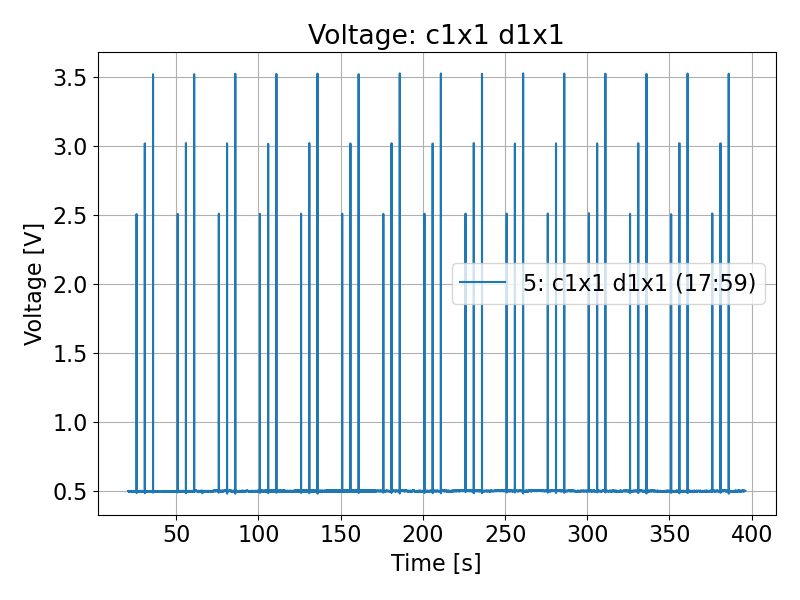

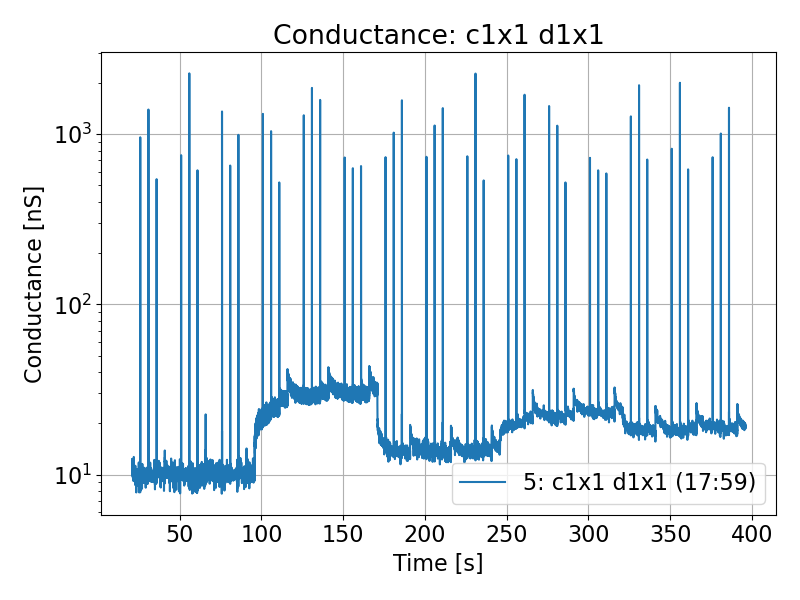

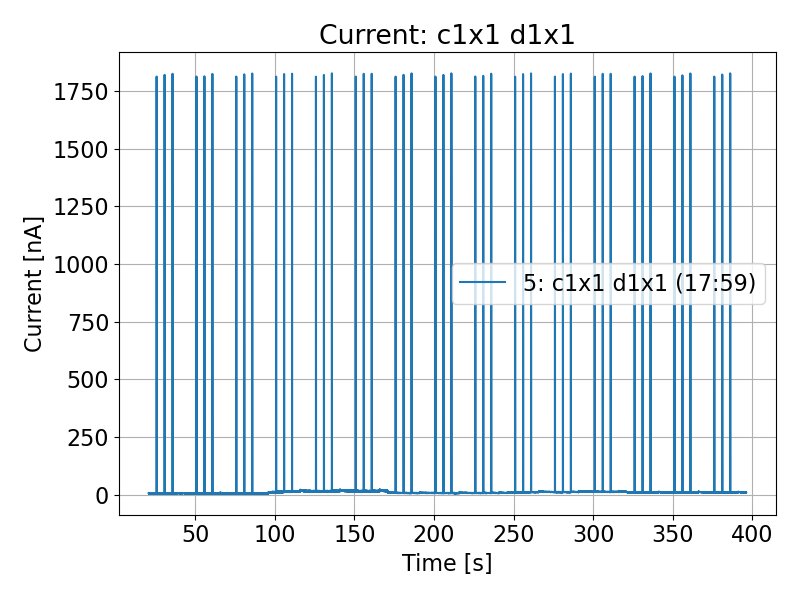

In [32]:
plt.close('all')

figures = []
figure_names = []
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    for spec in figure_specs:
        figsize_labelled = list(figsize)
        figsize_labelled[0] = figsize[0] * (1+figsize_factor*int(legend_pos == 'outside'))
        if spec['no_labels']:
            fig, axs = plt.subplots(1,1, figsize=figsize)
        else:
            fig, axs = plt.subplots(1,1, figsize=figsize_labelled)
        
        for i, idx in enumerate(plot_selection):
            m = an.measurements[idx]
            data = m['data'].iloc[::interleave]      
            x = data[spec['x_axis']]
            y = data[spec['y_axis']]
            if 'abs' in spec and spec['abs']:
                y = y.abs()
            if spec['xlim'].size:
                mask = (x >= spec['xlim'][0]) & (x <= spec['xlim'][1])
                x = x[mask]
                y = y[mask]
    
            color = color_map(cmap, i)
            if max_legend_entries is None or i < max_legend_entries:
                label = _parse_template(m, spec['legend_template'])
            else:
                label = '_no_label_'
            y_factor = spec['yfactor']
            axs.plot(x, y*y_factor, color=color, linestyle=linestyle_map[i], label=label);


        axs.set_xscale(spec['xscale'])
        axs.set_yscale(spec['yscale'])

        if spec['xlim'].size:
            axs.set_xlim(tuple(spec['xlim']))
        if spec['ylim'].size:
            axs.set_ylim(tuple(spec['ylim'] * y_factor))


        name = _parse_template(an.measurements[plot_selection[0]], spec['title'])
        figure_names.append(name)
        if not spec['no_labels']:
            legend_kwargs = {}
            if legend_pos == 'outside':
                legend_kwargs['bbox_to_anchor'] = (1,1)
                legend_kwargs['loc'] = 'upper left'
            else:
                legend_kwargs['loc'] = legend_pos
            
            if legend_labels:
                axs.legend(legend_labels, **legend_kwargs)
            else:
                axs.legend(**legend_kwargs)
                
            axs.set_xlabel(spec['x_axis'] + ' ' + units[spec['x_axis']])
            axs.set_ylabel(spec['y_axis'] + ' ' + units[spec['y_axis']])
            axs.set_title(name)
            axs.grid()

        
       
        
        fig.tight_layout()
        figures.append(fig)

### Save figures 

In [33]:
# savenames = figure_names
# subdirectory = 'clean'
# save_figures(figures, figure_specs, savenames, directory, subdirectory=subdirectory, filetype='pdf')

# Split Selection 

In [34]:
# Get timestamps at the falling edge of the voltage pulses > 1.2V
selection = selection_to_manipulate
print('selection: ' + str(selection))

an.set_selection(selection)

split_timestamps = an.pick_timestamps_trigger('Voltage', 1.4, timestamp_offset=-4e-3, n_points_before_pulse_end=0, n_points_per_pulse=1, active_edge='falling')
#print(split_timestamps)


selection: [5]


In [35]:
# Add timestamps manually (for example the time of the falling edge of the UV pulse)

idces_to_mod = selection_to_manipulate
t_stamps = {k:v for k,v in split_timestamps.items() if k in idces_to_mod}

t_stamps_mod = {k:[] for k in idces_to_mod}

for idx, stamps in t_stamps.items():
    for i, stamp in enumerate(stamps):
        t_stamps_mod[idx].append(stamp)
        if (i+1)%3 == 0:
            t_stamps_mod[idx].append(stamp+5.001)
    

display(t_stamps_mod)




{5: [25.843161240018844,
  30.846141480037073,
  35.84914172005626,
  40.85014172005626,
  50.856102440015945,
  55.85908268003418,
  60.86208292005336,
  65.86308292005336,
  75.86904364001305,
  80.87202388003126,
  85.87502412005044,
  90.87602412005045,
  100.88198484001013,
  105.88496508002835,
  110.88796532004754,
  115.88896532004755,
  125.89490604000626,
  130.89790628002547,
  135.90090652004466,
  140.90190652004466,
  150.9078472400034,
  155.91084748002257,
  160.9138277200408,
  165.91482772004082,
  175.9207884400005,
  180.92378868001967,
  185.92676892003792,
  190.92776892003792,
  200.93372963999758,
  205.93672988001677,
  210.93971012003502,
  215.94071012003502,
  225.94667083999468,
  230.94967108001387,
  235.95265132003212,
  240.95365132003212,
  250.95961203999178,
  255.96259228001003,
  260.9655925200292,
  265.96659252002917,
  275.9725532399889,
  280.9755334800071,
  285.9785337200263,
  290.97953372002627,
  300.985494439986,
  305.9884746800042,
  31

In [36]:
# Split selection

if not 'split_selections' in an.manipulated_selections:
    an.manipulated_selections['split_selections'] = {}
    
skip_known = False

In [37]:
split_points = split_timestamps
split_points = t_stamps_mod

col = 'Time'

add_labels = {}

overlap = 0
split_on_change = False
start_value = 0

if split_on_change:
    assert col != 'Time'

for sel,s in split_points.items():
    if skip_known and (sel in an.manipulated_selections['split_selections']):
        continue
    an.set_selection([sel])
    selection_split = an.split_selection(col, split_points, overlap=overlap, start_value=start_value, add_labels=add_labels)
    an.manipulated_selections['split_selections'][sel] = selection_split
    
#display(selection_split)

In [38]:
# Add custom attributes
attributes = {}

V_biases = [-0.5]*13 + [0.5]*12 + [-0.25]*12 + [0.25]*12 + [0]*12
V_pulses = [0.5] + [2.5, 3, 3.5, 'UV']*3*5
# V_biases = [-0.8]*13 + [0.8]*12 + [-0.4]*12 + [0.4]*12 + [0]*12
# V_pulses = [0.8] + [3, 4, 5, 'UV']*3*5

attributes[5] = {
    'V_bias': V_biases,
    'V_pulse': V_pulses
}

# V_biases = [-1.2]*13 + [1.2]*12 + [-0.6]*12 + [0.6]*12 + [0]*12
# V_pulses = [1.2] + [3, 4, 5, 'UV']*3*5

# attributes[1] = {
#     'V_bias': V_biases,
#     'V_pulse': V_pulses
# }


In [39]:
for idx in selection:
    split_sel = an.manipulated_selections['split_selections'][idx]
    print(split_sel)
    for i, split_idx in enumerate(split_sel):
        m = an.measurements[split_idx]
        m['V_bias'] = attributes[idx]['V_bias'][i]
        m['V_pulse'] = attributes[idx]['V_pulse'][i]
        m['idx'] = split_idx

['5_split_0', '5_split_1', '5_split_2', '5_split_3', '5_split_4', '5_split_5', '5_split_6', '5_split_7', '5_split_8', '5_split_9', '5_split_10', '5_split_11', '5_split_12', '5_split_13', '5_split_14', '5_split_15', '5_split_16', '5_split_17', '5_split_18', '5_split_19', '5_split_20', '5_split_21', '5_split_22', '5_split_23', '5_split_24', '5_split_25', '5_split_26', '5_split_27', '5_split_28', '5_split_29', '5_split_30', '5_split_31', '5_split_32', '5_split_33', '5_split_34', '5_split_35', '5_split_36', '5_split_37', '5_split_38', '5_split_39', '5_split_40', '5_split_41', '5_split_42', '5_split_43', '5_split_44', '5_split_45', '5_split_46', '5_split_47', '5_split_48', '5_split_49', '5_split_50', '5_split_51', '5_split_52', '5_split_53', '5_split_54', '5_split_55', '5_split_56', '5_split_57', '5_split_58', '5_split_59', '5_split_60']


In [40]:
an.manipulated_selections['split_selections']

{5: ['5_split_0',
  '5_split_1',
  '5_split_2',
  '5_split_3',
  '5_split_4',
  '5_split_5',
  '5_split_6',
  '5_split_7',
  '5_split_8',
  '5_split_9',
  '5_split_10',
  '5_split_11',
  '5_split_12',
  '5_split_13',
  '5_split_14',
  '5_split_15',
  '5_split_16',
  '5_split_17',
  '5_split_18',
  '5_split_19',
  '5_split_20',
  '5_split_21',
  '5_split_22',
  '5_split_23',
  '5_split_24',
  '5_split_25',
  '5_split_26',
  '5_split_27',
  '5_split_28',
  '5_split_29',
  '5_split_30',
  '5_split_31',
  '5_split_32',
  '5_split_33',
  '5_split_34',
  '5_split_35',
  '5_split_36',
  '5_split_37',
  '5_split_38',
  '5_split_39',
  '5_split_40',
  '5_split_41',
  '5_split_42',
  '5_split_43',
  '5_split_44',
  '5_split_45',
  '5_split_46',
  '5_split_47',
  '5_split_48',
  '5_split_49',
  '5_split_50',
  '5_split_51',
  '5_split_52',
  '5_split_53',
  '5_split_54',
  '5_split_55',
  '5_split_56',
  '5_split_57',
  '5_split_58',
  '5_split_59',
  '5_split_60']}

In [41]:
an.measurements['5_split_40']['V_bias']

0.25

# Plot Split Measurement

In [42]:
#  ======== user input ==============
selection = [5]

chosen_sel = 'normal'
chosen_sel = 'split_selections'
#  ==================================

In [43]:
#  ======== user input ====================================
split_idces = list(range(1, 13)) # All pulses bias -0.5
# split_idces = list(range(13, 25)) # All pulses bias 0.5
# split_idces = list(range(25, 37)) # All pulses bias -0.25
# split_idces = list(range(37, 49)) # All pulses bias 0.25
# split_idces = list(range(49, 61)) # All pulses bias 0

# split_idces = list(range(1, 13)) # All pulses bias -0.8
# split_idces = list(range(13, 25)) # All pulses bias 0.8
# split_idces = list(range(25, 37)) # All pulses bias -0.4
#split_idces = list(range(37, 49)) # All pulses bias 0.4
#split_idces = list(range(49, 61)) # All pulses bias 0

plot_selection = []

for idx in selection:
    man_sel = an.manipulated_selections[chosen_sel][idx]
    if chosen_sel != 'normal':
        man_sel = [s for i,s in enumerate(man_sel) if i in split_idces]
        
    plot_selection += man_sel

In [44]:
print(plot_selection)

['5_split_1', '5_split_2', '5_split_3', '5_split_4', '5_split_5', '5_split_6', '5_split_7', '5_split_8', '5_split_9', '5_split_10', '5_split_11', '5_split_12']


### Plot Setup 

In [45]:
# Data Range
interleave = 5

xlim = [0, 0.04]

y_factor = 1e9

In [46]:
# Plot Design
figsize = (8,6)

figsize_factor = 0.5

font = {'weight' : 'normal',
        'size'   : 16}
        
plt.rc('font', **font)

cmap = plt.cm.get_cmap('tab10')
colors = plt.cm.hsv(np.linspace(0,1,4))

def color_map(cmap, i):
    # mapping = list(range(10))
    # mapping = [2, 3, 2, 3]
    mapping = [0,1,2,4,0,1,2,4,0,1,2,4]
    #mapping = None
    if mapping is None or int(i) >= len(mapping):
        return cmap(int(i)%10)
    elif type(mapping[int(i)]) is int:     
        return cmap(mapping[int(i)])
    else:
        return mapping[int(i)]

# def color_map(cmap, i):
#     return colors[i]


linestyle_map = ['-']*100
#linestyle_map = ['--', '--', '-', '-', '-', '--', '-', '--', '-', '--']

/tmp/ipykernel_590131/3648187332.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10')


In [47]:
# Labels
no_labels = False

title_template = 'Split {cluster} {device} (V_bias = {V_bias}V)'
#title_template = 'DC'

units = {'Conductance': '[nS]', 'Time': '[s]', 'Voltage': '[V]', 'Current': '[nA]'}


legend_template = 'V_pulse = {V_pulse} ({timestamp:%H:%M})'

max_legend_entries = 4

legend_labels = []

legend_pos = 'outside'
#legend_pos = 'best'
#legend_pos = 'upper right'

In [48]:
# Figure specification
figure_specs = [
    {
        'title': 'Voltage: ' + title_template,
        'x_axis': 'Time',
        'y_axis': 'Voltage',
        'abs': False,
        'xscale': 'linear',
        'yscale': 'linear',
        'xlim': np.array([]),
        'ylim': np.array([]),
        'yfactor': 1,
        'legend_template': legend_template,
        'no_labels': no_labels
    },
    {
        'title': 'Conductance: ' + title_template,
        'x_axis': 'Time',
        'y_axis': 'Conductance',
        'abs': False,
        'xscale': 'linear',
        'yscale': 'log',
        'xlim': np.array([]),
        'ylim': np.array([]), #[9e-9, 30e-9]
        'yfactor': y_factor,
        'legend_template': legend_template,
        'no_labels': no_labels
    },
    {
        'title': 'Current: ' + title_template,
        'x_axis': 'Time',
        'y_axis': 'Current',
        'abs': False,
        'xscale': 'linear',
        'yscale': 'linear',
        'xlim': np.array([]),
        'ylim': np.array([]), # [4e-9, 20e-9]
        'yfactor': y_factor,
        'legend_template': legend_template,
        'no_labels': no_labels
    },    
    {
        'title': 'Voltage Zoom: ' + title_template,
        'x_axis': 'Time',
        'y_axis': 'Voltage',
        'abs': False,
        'xscale': 'linear',
        'yscale': 'linear',
        'xlim': np.array(xlim),
        'ylim': np.array([]),
        'yfactor': 1,
        'legend_template': legend_template,
        'no_labels': no_labels
    },
    {
        'title': 'Conductance Zoom: ' + title_template,
        'x_axis': 'Time',
        'y_axis': 'Conductance',
        'abs': False,
        'xscale': 'linear',
        'yscale': 'log',
        'xlim': np.array(xlim),
        'ylim': np.array([]), #[9e-9, 30e-9]
        'yfactor': y_factor,
        'legend_template': legend_template,
        'no_labels': no_labels
    },
    {
        'title': 'Current Zoom: ' + title_template,
        'x_axis': 'Time',
        'y_axis': 'Current',
        'abs': False,
        'xscale': 'linear',
        'yscale': 'linear',
        'xlim': np.array(xlim),
        'ylim': np.array([]), # [4e-9, 20e-9]
        'yfactor': y_factor,
        'legend_template': legend_template,
        'no_labels': no_labels
    },    
]   

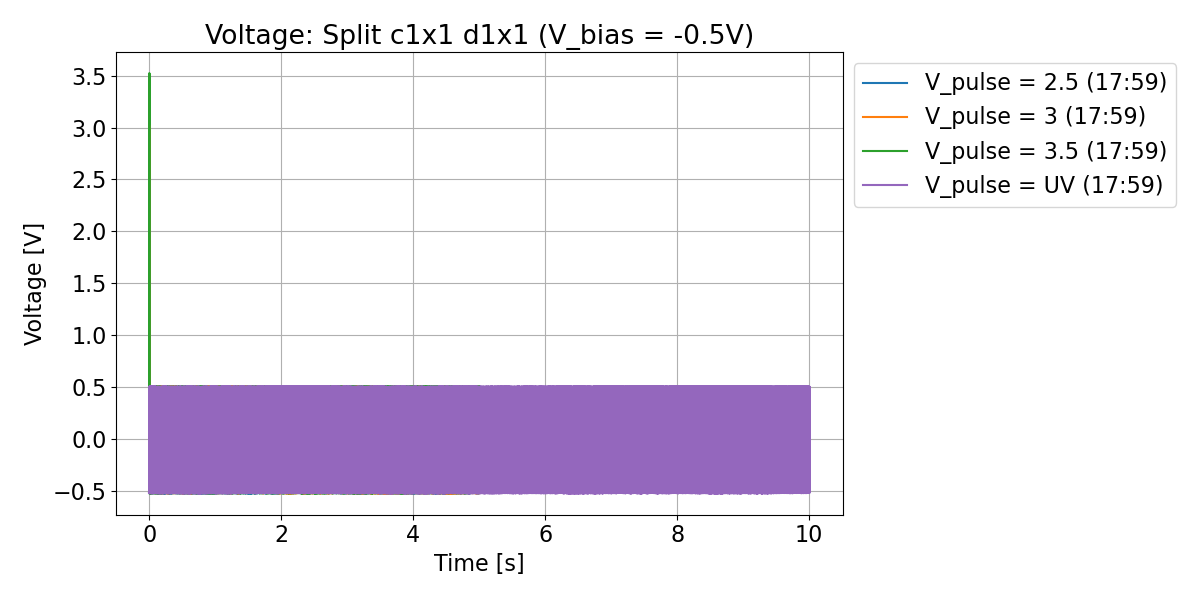

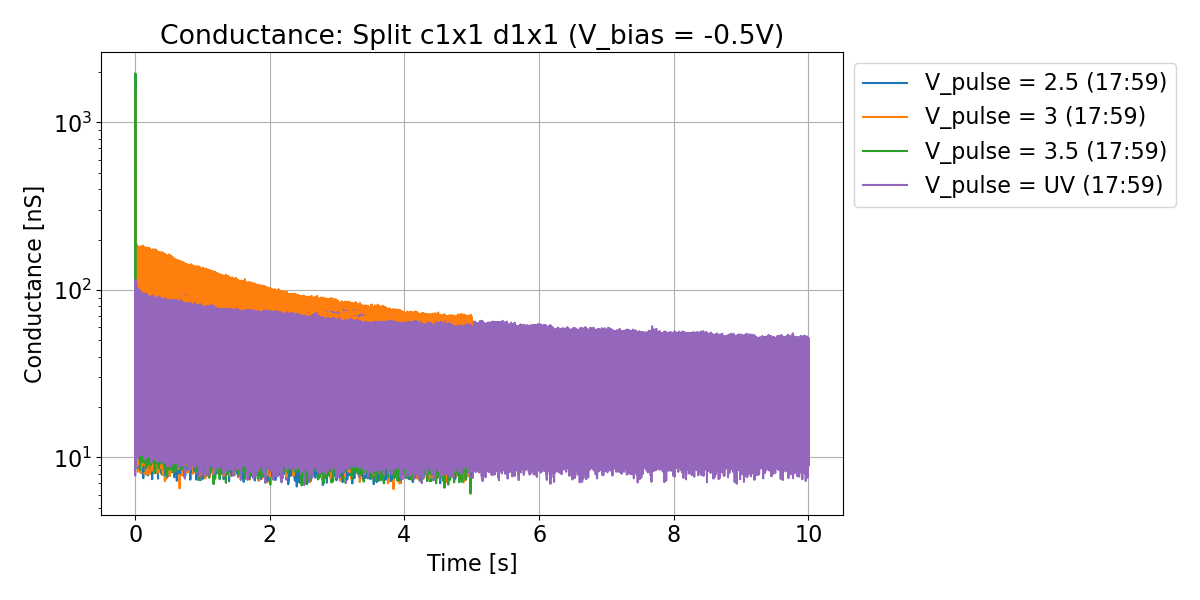

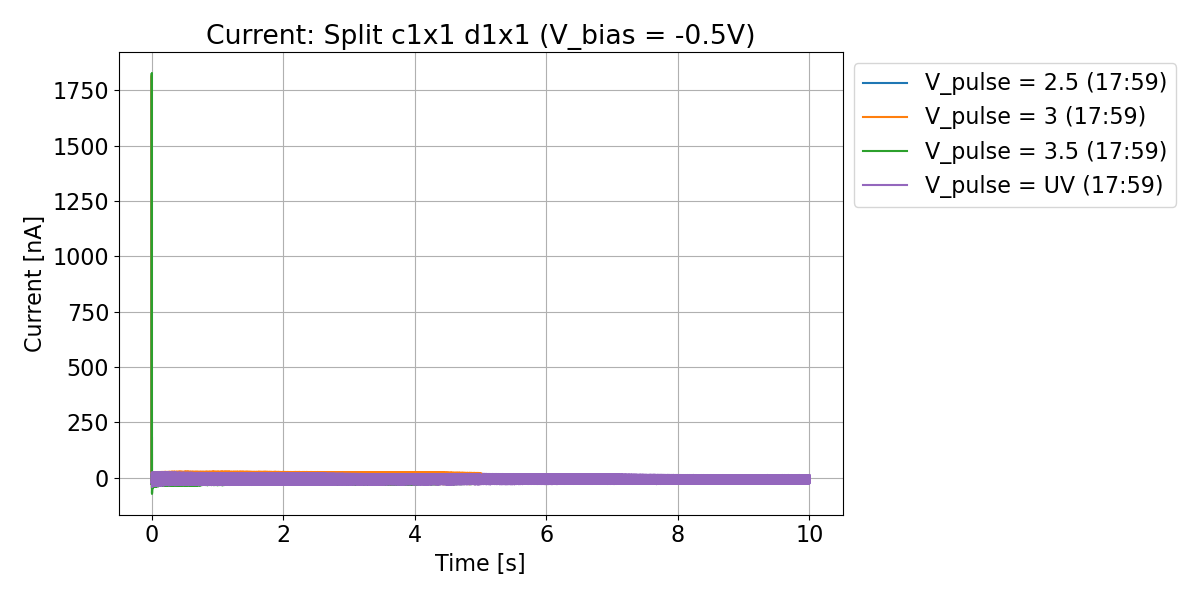

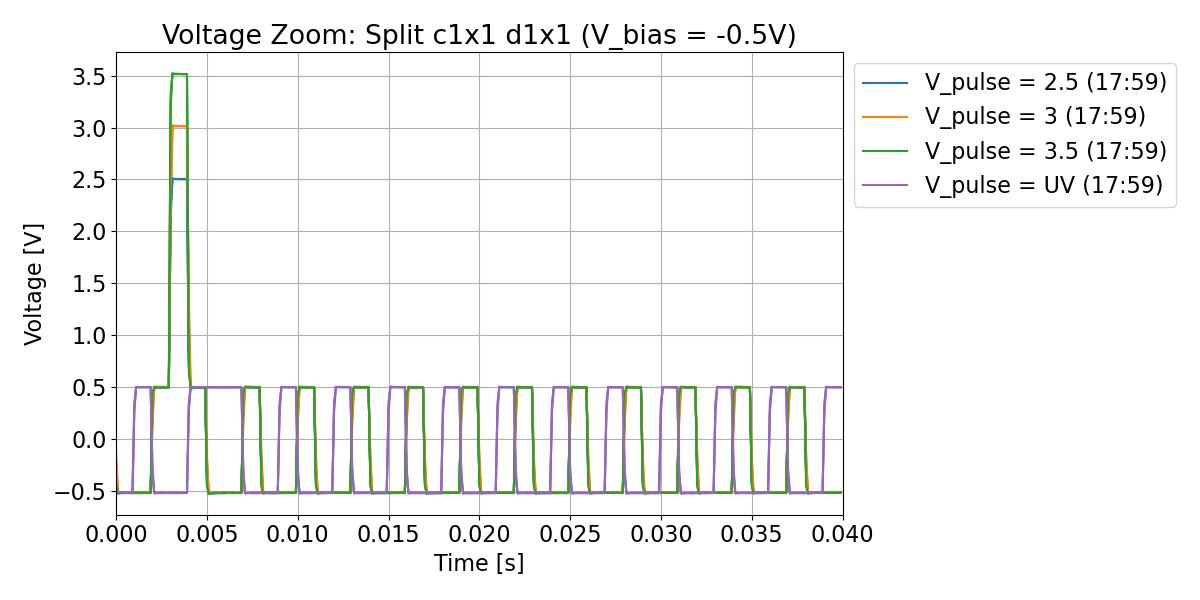

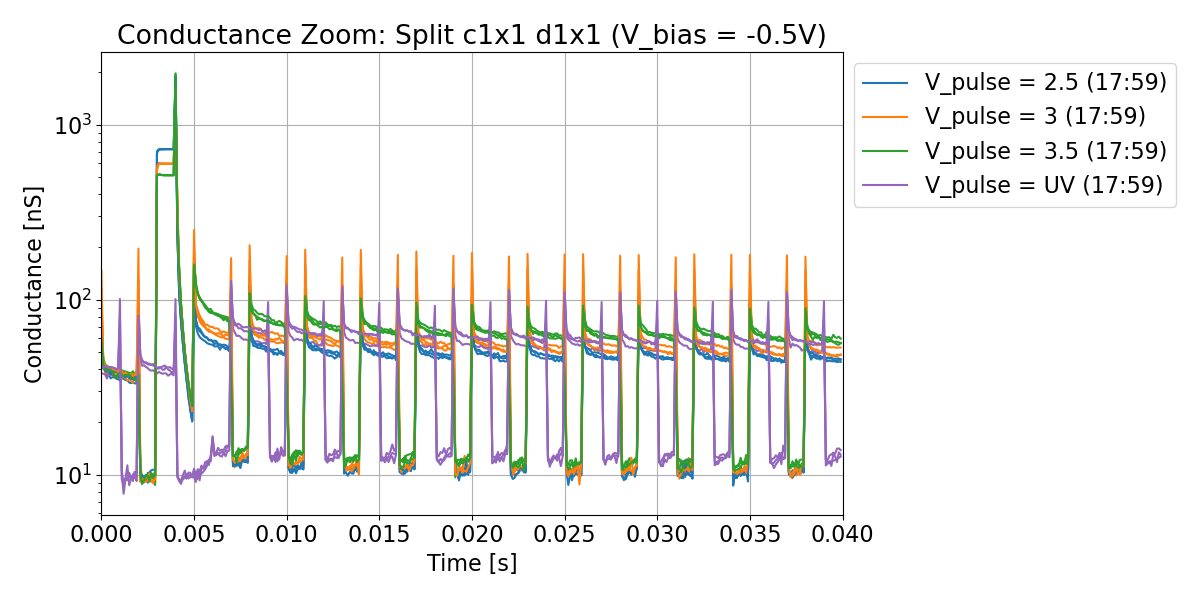

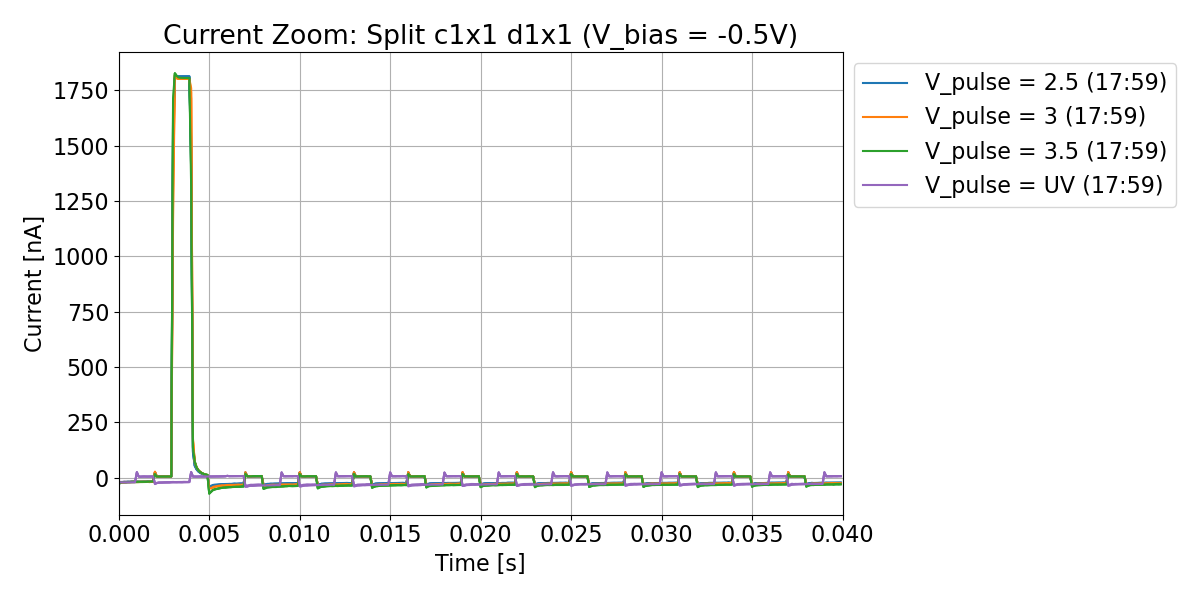

In [49]:
plt.close('all')

figures = []
figure_names = []
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    for spec in figure_specs:
        figsize_labelled = list(figsize)
        figsize_labelled[0] = figsize[0] * (1+figsize_factor*int(legend_pos == 'outside'))
        if spec['no_labels']:
            fig, axs = plt.subplots(1,1, figsize=figsize)
        else:
            fig, axs = plt.subplots(1,1, figsize=figsize_labelled)
        
        for i, idx in enumerate(plot_selection):
            m = an.measurements[idx]
            data = m['data'].iloc[::interleave]      
            x = data[spec['x_axis']]
            y = data[spec['y_axis']]
            if 'abs' in spec and spec['abs']:
                y = y.abs()
            if spec['xlim'].size:
                mask = (x >= spec['xlim'][0]) & (x <= spec['xlim'][1])
                x = x[mask]
                y = y[mask]
    
            color = color_map(cmap, i)
            if max_legend_entries is None or i < max_legend_entries:
                label = _parse_template(m, spec['legend_template'])
            else:
                label = '_no_label_'
            y_factor = spec['yfactor']
            axs.plot(x, y*y_factor, color=color, linestyle=linestyle_map[i], label=label);


        axs.set_xscale(spec['xscale'])
        axs.set_yscale(spec['yscale'])

        if spec['xlim'].size:
            axs.set_xlim(tuple(spec['xlim']))
        if spec['ylim'].size:
            axs.set_ylim(tuple(spec['ylim'] * y_factor))


        name = _parse_template(an.measurements[plot_selection[0]], spec['title'])
        figure_names.append(name)
        if not spec['no_labels']:
            legend_kwargs = {}
            if legend_pos == 'outside':
                legend_kwargs['bbox_to_anchor'] = (1,1)
                legend_kwargs['loc'] = 'upper left'
            else:
                legend_kwargs['loc'] = legend_pos
            
            if legend_labels:
                axs.legend(legend_labels, **legend_kwargs)
            else:
                axs.legend(**legend_kwargs)
                
            axs.set_xlabel(spec['x_axis'] + ' ' + units[spec['x_axis']])
            axs.set_ylabel(spec['y_axis'] + ' ' + units[spec['y_axis']])
            axs.set_title(name)
            axs.grid()

        
       
        
        fig.tight_layout()
        figures.append(fig)

### Save figures 

In [141]:
# savenames = figure_names
# subdirectory = 'clean'
# save_figures(figures, figure_specs, savenames, directory, subdirectory=subdirectory, filetype='pdf')

/baltic/users/optolabdata/Experiments/ChristophWeilenmann/2024-08-20_cleansweep_8_first_pulses/clean/Voltage_Split_c1x1_d1x1_V_bias_=_0V
/baltic/users/optolabdata/Experiments/ChristophWeilenmann/2024-08-20_cleansweep_8_first_pulses/clean/Conductance_Split_c1x1_d1x1_V_bias_=_0V_ylog
/baltic/users/optolabdata/Experiments/ChristophWeilenmann/2024-08-20_cleansweep_8_first_pulses/clean/Current_Split_c1x1_d1x1_V_bias_=_0V
/baltic/users/optolabdata/Experiments/ChristophWeilenmann/2024-08-20_cleansweep_8_first_pulses/clean/Voltage_Zoom_Split_c1x1_d1x1_V_bias_=_0V_x=0E+00_to_4E-02
/baltic/users/optolabdata/Experiments/ChristophWeilenmann/2024-08-20_cleansweep_8_first_pulses/clean/Conductance_Zoom_Split_c1x1_d1x1_V_bias_=_0V_ylog_x=0E+00_to_4E-02
/baltic/users/optolabdata/Experiments/ChristophWeilenmann/2024-08-20_cleansweep_8_first_pulses/clean/Current_Zoom_Split_c1x1_d1x1_V_bias_=_0V_x=0E+00_to_4E-02


# Manipulate Split Selection

In [236]:
selection = selection_to_manipulate
#selection = [42]


### Pick Points Trigger

In [237]:
sel = selection
act_on_selections = 'split_selections'
#act_on_selections = 'normal'

In [238]:
if not 'triggered_selections' in an.manipulated_selections:
    an.manipulated_selections['triggered_selections'] = {}
    
skip_known = False

In [239]:
#tr_level = 0.78
tr_level = {0:0.7, 1:1.18}
tr_level = {0:0.7, 1:1.18, 5:0.48}

n_points_per_pulse = 1
n_points_before_pulse_end = 2
active_edge = 'falling'
fill_above_trigger_level_points = None

In [240]:
triggered_selections = {}
for s in sel:
    if skip_known and (s in an.manipulated_selections['triggered_selections']):
        continue
    
    act_sel = an.manipulated_selections[act_on_selections][s]
    try:
        trigger_level = tr_level[s]
    except Exception:
        an.manipulated_selections['triggered_selections'][s] = act_sel
        continue

    an.set_selection(act_sel)
    an.manipulated_selections['triggered_selections'][s] = an.pick_points_trigger(trigger_level, n_points_per_pulse=n_points_per_pulse, n_points_before_pulse_end=n_points_before_pulse_end, 
                                                                                  active_edge=active_edge, fill_above_trigger_level_points=fill_above_trigger_level_points)
    


In [241]:
print(an.manipulated_selections['triggered_selections'])

{5: ['5_split_0_trig', '5_split_1_trig', '5_split_2_trig', '5_split_3_trig', '5_split_4_trig', '5_split_5_trig', '5_split_6_trig', '5_split_7_trig', '5_split_8_trig', '5_split_9_trig', '5_split_10_trig', '5_split_11_trig', '5_split_12_trig', '5_split_13_trig', '5_split_14_trig', '5_split_15_trig', '5_split_16_trig', '5_split_17_trig', '5_split_18_trig', '5_split_19_trig', '5_split_20_trig', '5_split_21_trig', '5_split_22_trig', '5_split_23_trig', '5_split_24_trig', '5_split_25_trig', '5_split_26_trig', '5_split_27_trig', '5_split_28_trig', '5_split_29_trig', '5_split_30_trig', '5_split_31_trig', '5_split_32_trig', '5_split_33_trig', '5_split_34_trig', '5_split_35_trig', '5_split_36_trig', '5_split_37_trig', '5_split_38_trig', '5_split_39_trig', '5_split_40_trig', '5_split_41_trig', '5_split_42_trig', '5_split_43_trig', '5_split_44_trig', '5_split_45_trig', '5_split_46_trig', '5_split_47_trig', '5_split_48_trig', '5_split_49_trig', '5_split_50_trig', '5_split_51_trig', '5_split_52_trig'

### Moving Average

In [242]:
sel = selection
act_on_selections = 'triggered_selections'

In [243]:
if not 'mov_avg_selections' in an.manipulated_selections:
    an.manipulated_selections['mov_avg_selections'] = {}
    
skip_known = False

In [244]:
window = 10

mov_avg_selections = {}
for s in sel:
    if skip_known and (s in an.manipulated_selections['mov_avg_selections']):
        continue
     
    act_sel = an.manipulated_selections[act_on_selections][s]

    an.set_selection(act_sel)
    an.manipulated_selections['mov_avg_selections'][s] = an.moving_avg(['Conductance', 'Current'], window=window)

#print(mov_avg_selections)


### Scale Selection 

In [245]:
sel = selection
act_on_selections = 'triggered_selections'
#act_on_selections = 'mov_avg_selections'
#act_on_selections = 'cut_selections'

In [246]:
if not 'scaled_selections' in an.manipulated_selections:
    an.manipulated_selections['scaled_selections'] = {}
    
skip_known = False
scale_method = 'add'
set_G = 10e-9

In [247]:
scaled_selections = {}
for s in sel:
    if skip_known and (s in an.manipulated_selections['scaled_selections']):
        continue
        
    act_sel = an.manipulated_selections[act_on_selections][s]

    an.set_selection(act_sel)
    an.manipulated_selections['scaled_selections'][s] = an.scale_selection('Time', 'Conductance', [0, 1.5e-3], scale_method=scale_method, set_G=set_G)

#print(scaled_selections)


# Inspect Read Extraction

In [248]:
# ====== user input ========================
selection = selection
selection = [5]

chosen_sel_1 = 'split_selections'
#chosen_sel_1 = 'mov_avg_selections'
chosen_sel_2 = 'triggered_selections'
# ==========================================

In [249]:
choose_split = True
split_idces = [5]

# split_idces = list(range(1, 13)) # All pulses bias -0.8
# split_idces = list(range(13, 25)) # All pulses bias 0.8
# split_idces = list(range(25, 37)) # All pulses bias -0.4
# split_idces = list(range(37, 49)) # All pulses bias 0.4
# split_idces = list(range(49, 61)) # All pulses bias 0

plot_selection = []

for idx in selection:
    man_sel = an.manipulated_selections[chosen_sel_1][idx]
    if choose_split:
        man_sel = [s for i,s in enumerate(man_sel) if i in split_idces]
        
    plot_selection += man_sel

for idx in selection:
    man_sel = an.manipulated_selections[chosen_sel_2][idx]
    if choose_split:
        man_sel = [s for i,s in enumerate(man_sel) if i in split_idces]
        
    plot_selection += man_sel

In [250]:
print(plot_selection)

['5_split_5', '5_split_5_trig']


### Plot Setup 

In [251]:
# Data Range
interleave = 1

xlim = [0, 0.04]

y_factor = 1e9

In [252]:
# Plot Design
figsize = (8,6)

figsize_factor = 0.5

font = {'weight' : 'normal',
        'size'   : 16}
        
plt.rc('font', **font)

cmap = plt.cm.get_cmap('tab10')
def color_map(cmap, i):
    # mapping = list(range(10))
    # mapping = [2, 3, 2, 3]
    mapping = [0,1,2,4,0,1,2,4,0,1,2,4]
    #mapping = None
    if mapping is None or int(i) >= len(mapping):
        return cmap(int(i)%10)
    elif type(mapping[int(i)]) is int:     
        return cmap(mapping[int(i)])
    else:
        return mapping[int(i)]

# def color_map(cmap, i):
#     return colors[i]


linestyle_map = ['-']*100
#linestyle_map = ['--', '--', '-', '-', '-', '--', '-', '--', '-', '--']

grid = True

/tmp/ipykernel_590131/4100105665.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10')


In [253]:
# Labels
no_labels = False

title_template = 'Split only Read {cluster} {device} (V_bias = {V_bias}V)'
#title_template = 'DC'

units = {'Conductance': '[nS]', 'Time': '[s]', 'Voltage': '[V]', 'Current': '[nA]'}


legend_template = '{idx}'

legend_labels = []

max_legend_entries = 4

legend_pos = 'outside'
#legend_pos = 'best'
legend_pos = 'upper right'


In [254]:
# Figure specification
figure_specs = [
    {
        'title': 'Voltage: ' + title_template,
        'x_axis': 'Time',
        'y_axis': 'Voltage',
        'abs': False,
        'xscale': 'linear',
        'yscale': 'linear',
        'xlim': np.array([]),
        'ylim': np.array([]),
        'yfactor': 1,
        'legend_template': legend_template,
        'no_labels': no_labels
    },
    {
        'title': 'Conductance: ' + title_template,
        'x_axis': 'Time',
        'y_axis': 'Conductance',
        'abs': False,
        'xscale': 'linear',
        'yscale': 'log',
        'xlim': np.array([]),
        'ylim': np.array([]), #[9e-9, 30e-9]
        'yfactor': y_factor,
        'legend_template': legend_template,
        'no_labels': no_labels
    },
    {
        'title': 'Current: ' + title_template,
        'x_axis': 'Time',
        'y_axis': 'Current',
        'abs': False,
        'xscale': 'linear',
        'yscale': 'linear',
        'xlim': np.array([]),
        'ylim': np.array([]), # [4e-9, 20e-9]
        'yfactor': y_factor,
        'legend_template': legend_template,
        'no_labels': no_labels
    },    
    {
        'title': 'Voltage Zoom: ' + title_template,
        'x_axis': 'Time',
        'y_axis': 'Voltage',
        'abs': False,
        'xscale': 'linear',
        'yscale': 'linear',
        'xlim': np.array(xlim),
        'ylim': np.array([]),
        'yfactor': 1,
        'legend_template': legend_template,
        'no_labels': no_labels,
        'plt_kwargs': {'marker':'o', 'markersize':4}
    },
    {
        'title': 'Conductance Zoom: ' + title_template,
        'x_axis': 'Time',
        'y_axis': 'Conductance',
        'abs': False,
        'xscale': 'linear',
        'yscale': 'log',
        'xlim': np.array(xlim),
        'ylim': np.array([]), #[9e-9, 30e-9]
        'yfactor': y_factor,
        'legend_template': legend_template,
        'no_labels': no_labels,
        'markers': True,
        'plt_kwargs': {'marker':'o', 'markersize':4}
    },
    {
        'title': 'Current Zoom: ' + title_template,
        'x_axis': 'Time',
        'y_axis': 'Current',
        'abs': False,
        'xscale': 'linear',
        'yscale': 'linear',
        'xlim': np.array(xlim),
        'ylim': np.array([]), # [4e-9, 20e-9]
        'yfactor': y_factor,
        'legend_template': legend_template,
        'no_labels': no_labels,
        'markers': True,
        'plt_kwargs': {'marker':'o', 'markersize':4}
    },    
]   

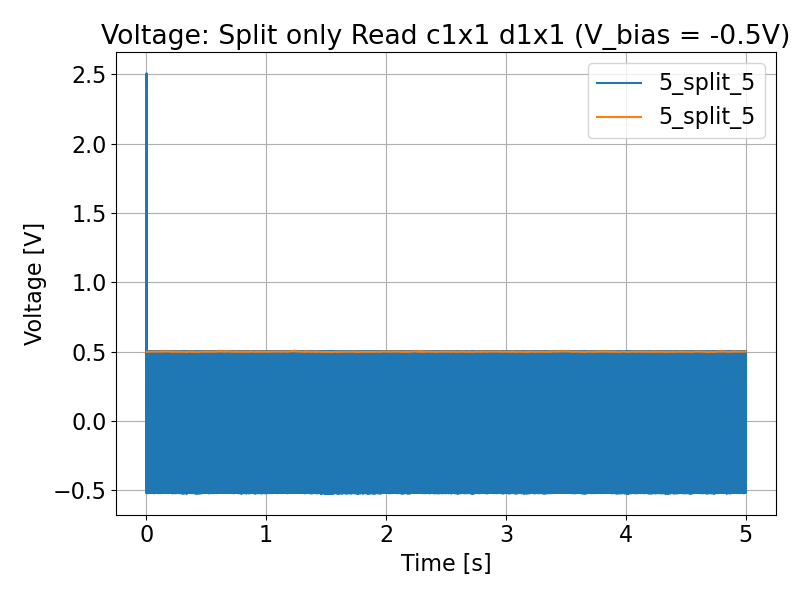

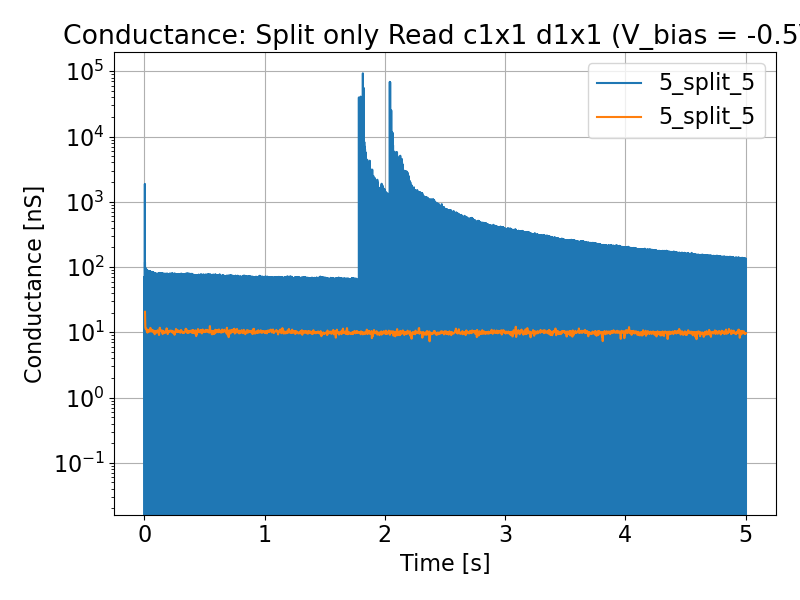

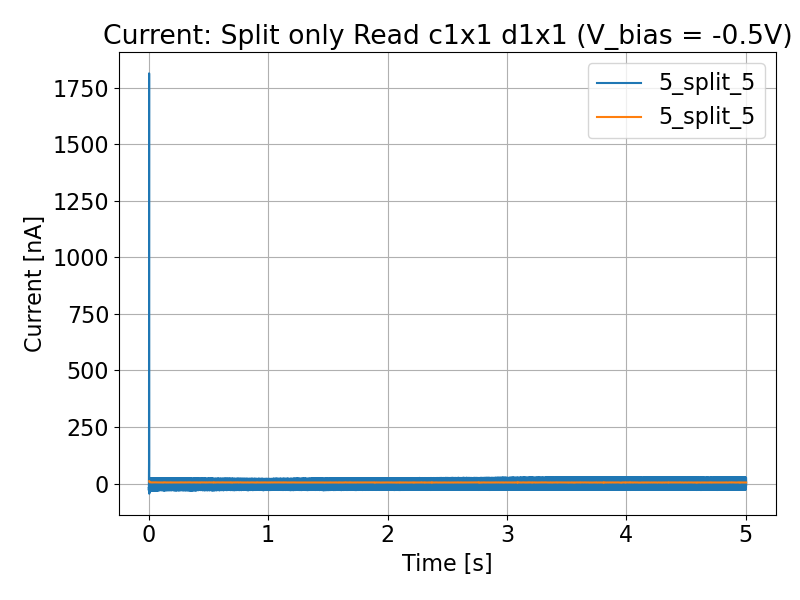

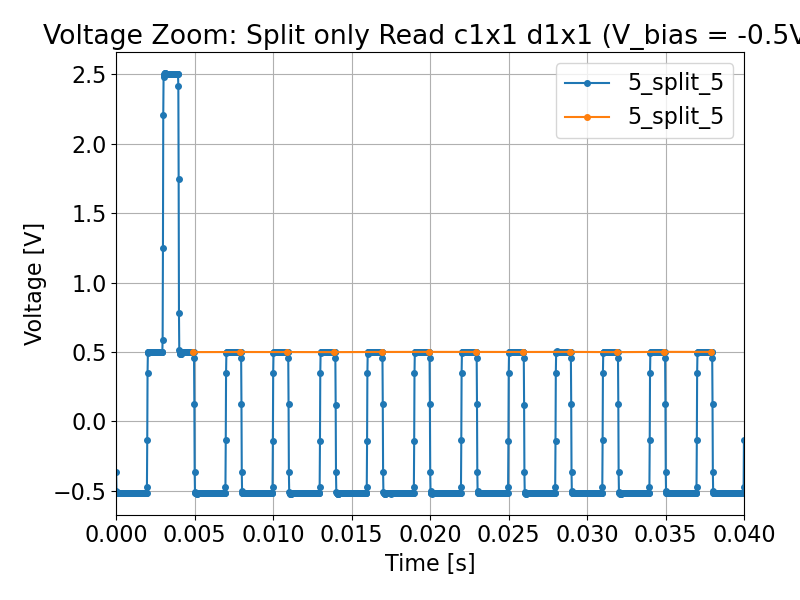

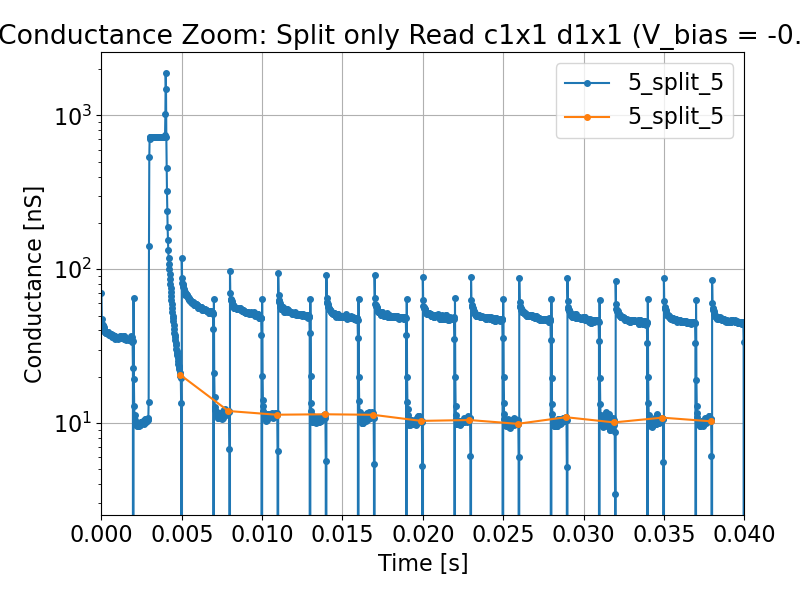

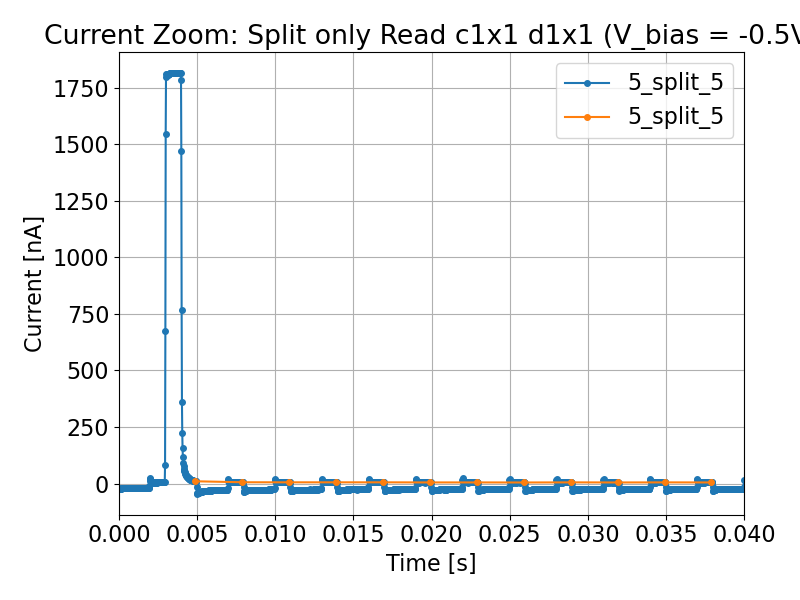

In [255]:
plt.close('all')

figures = []
figure_names = []
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    for spec in figure_specs:
        figsize_labelled = list(figsize)
        figsize_labelled[0] = figsize[0] * (1+figsize_factor*int(legend_pos == 'outside'))
        if spec['no_labels']:
            fig, axs = plt.subplots(1,1, figsize=figsize)
        else:
            fig, axs = plt.subplots(1,1, figsize=figsize_labelled)
        
        for i, idx in enumerate(plot_selection):
            m = an.measurements[idx]
            data = m['data'].iloc[::interleave]      
            x = data[spec['x_axis']]
            y = data[spec['y_axis']]
            if 'abs' in spec and spec['abs']:
                y = y.abs()
            if spec['xlim'].size:
                mask = (x >= spec['xlim'][0]) & (x <= spec['xlim'][1])
                x = x[mask]
                y = y[mask]

            y_factor = spec['yfactor']

            color = color_map(cmap, i)

            if max_legend_entries is None or i < max_legend_entries:
                label = _parse_template(m, spec['legend_template'])
            else:
                label = '_no_label_'

            if 'plt_kwargs' in spec and spec['plt_kwargs']:
                plt_kwargs = spec['plt_kwargs']
            else:
                plt_kwargs = {}
            
            axs.plot(x, y*y_factor, color=color, linestyle=linestyle_map[i], label=label, **plt_kwargs);


        axs.set_xscale(spec['xscale'])
        axs.set_yscale(spec['yscale'])

        if spec['xlim'].size:
            axs.set_xlim(tuple(spec['xlim']))
        if spec['ylim'].size:
            axs.set_ylim(tuple(spec['ylim'] * y_factor))


        name = _parse_template(an.measurements[plot_selection[0]], spec['title'])
        figure_names.append(name)
        if not spec['no_labels']:
            legend_kwargs = {}
            if legend_pos == 'outside':
                legend_kwargs['bbox_to_anchor'] = (1,1)
                legend_kwargs['loc'] = 'upper left'
            else:
                legend_kwargs['loc'] = legend_pos
            
            if legend_labels:
                axs.legend(legend_labels, **legend_kwargs)
            else:
                axs.legend(**legend_kwargs)
                
            axs.set_xlabel(spec['x_axis'] + ' ' + units[spec['x_axis']])
            axs.set_ylabel(spec['y_axis'] + ' ' + units[spec['y_axis']])
            axs.set_title(name)
            if grid:
                axs.grid()

        
       
        
        fig.tight_layout()
        figures.append(fig)

### Save figures 

In [70]:
# savenames = figure_names
# subdirectory = 'clean'
# save_figures(figures, figure_specs, savenames, directory, subdirectory=subdirectory, filetype='pdf')

# Plot same bias only during Read

In [112]:
# ====== user input ========================
selection = selection
selection = [5]

chosen_sel = 'normal'
chosen_sel = 'split_selections'
chosen_sel = 'triggered_selections'
#chosen_sel = 'mov_avg_selections'
# ==========================================

In [113]:
choose_split = True
split_idces = list(range(1, 12)) # All pulses bias -0.8
# split_idces = list(range(13, 25)) # All pulses bias 0.8
# split_idces = list(range(25, 37)) # All pulses bias -0.4
# split_idces = list(range(37, 49)) # All pulses bias 0.4
# split_idces = list(range(49, 61)) # All pulses bias 0

plot_selection = []

for idx in selection:
    man_sel = an.manipulated_selections[chosen_sel][idx]
    if choose_split:
        man_sel = [s for i,s in enumerate(man_sel) if i in split_idces]
        
    plot_selection += man_sel

In [114]:
print(plot_selection)

['5_split_1_trig_trig', '5_split_2_trig_trig', '5_split_3_trig_trig', '5_split_4_trig_trig', '5_split_5_trig_trig', '5_split_6_trig_trig', '5_split_7_trig_trig', '5_split_8_trig_trig', '5_split_9_trig_trig', '5_split_10_trig_trig', '5_split_11_trig_trig']


### Plot Setup 

In [115]:
# Data Range
interleave = 1

xlim = [0, 0.04]

y_factor = 1e9

In [116]:
# Plot Design
figsize = (8,6)

figsize_factor = 0.5

font = {'weight' : 'normal',
        'size'   : 16}
        
plt.rc('font', **font)

cmap = plt.cm.get_cmap('tab10')
colors = plt.cm.hsv(np.linspace(0,1,4))

def color_map(cmap, i):
    # mapping = list(range(10))
    # mapping = [2, 3, 2, 3]
    mapping = [0,1,2,4,0,1,2,4,0,1,2,4]
    #mapping = None
    if mapping is None or int(i) >= len(mapping):
        return cmap(int(i)%10)
    elif type(mapping[int(i)]) is int:     
        return cmap(mapping[int(i)])
    else:
        return mapping[int(i)]

# def color_map(cmap, i):
#     return colors[i]


linestyle_map = ['-']*100
#linestyle_map = ['--', '--', '-', '-', '-', '--', '-', '--', '-', '--']

/tmp/ipykernel_590131/3648187332.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10')


In [117]:
# Labels
no_labels = False

title_template = 'Split only Read {cluster} {device} (V_bias = {V_bias}V)'
#title_template = 'DC'

units = {'Conductance': '[nS]', 'Time': '[s]', 'Voltage': '[V]', 'Current': '[nA]'}


legend_template = 'V_pulse = {V_pulse}V ({timestamp:%H:%M})'

legend_labels = []

max_legend_entries = 4

legend_pos = 'outside'
#legend_pos = 'best'
#legend_pos = 'upper right'


In [118]:
# Figure specification
figure_specs = [
    {
        'title': 'Voltage: ' + title_template,
        'x_axis': 'Time',
        'y_axis': 'Voltage',
        'abs': False,
        'xscale': 'linear',
        'yscale': 'linear',
        'xlim': np.array([]),
        'ylim': np.array([]),
        'yfactor': 1,
        'legend_template': legend_template,
        'no_labels': no_labels
    },
    {
        'title': 'Conductance: ' + title_template,
        'x_axis': 'Time',
        'y_axis': 'Conductance',
        'abs': False,
        'xscale': 'log',
        'yscale': 'log',
        'xlim': np.array([]),
        'ylim': np.array([]), #[9e-9, 30e-9]
        'yfactor': y_factor,
        'legend_template': legend_template,
        'no_labels': no_labels
    },
    {
        'title': 'Current: ' + title_template,
        'x_axis': 'Time',
        'y_axis': 'Current',
        'abs': False,
        'xscale': 'linear',
        'yscale': 'linear',
        'xlim': np.array([]),
        'ylim': np.array([]), # [4e-9, 20e-9]
        'yfactor': y_factor,
        'legend_template': legend_template,
        'no_labels': no_labels
    },    
    {
        'title': 'Voltage Zoom: ' + title_template,
        'x_axis': 'Time',
        'y_axis': 'Voltage',
        'abs': False,
        'xscale': 'linear',
        'yscale': 'linear',
        'xlim': np.array(xlim),
        'ylim': np.array([]),
        'yfactor': 1,
        'legend_template': legend_template,
        'no_labels': no_labels
    },
    {
        'title': 'Conductance Zoom: ' + title_template,
        'x_axis': 'Time',
        'y_axis': 'Conductance',
        'abs': False,
        'xscale': 'linear',
        'yscale': 'log',
        'xlim': np.array(xlim),
        'ylim': np.array([]), #[9e-9, 30e-9]
        'yfactor': y_factor,
        'legend_template': legend_template,
        'no_labels': no_labels
    },
    {
        'title': 'Current Zoom: ' + title_template,
        'x_axis': 'Time',
        'y_axis': 'Current',
        'abs': False,
        'xscale': 'linear',
        'yscale': 'linear',
        'xlim': np.array(xlim),
        'ylim': np.array([]), # [4e-9, 20e-9]
        'yfactor': y_factor,
        'legend_template': legend_template,
        'no_labels': no_labels
    },    
]   

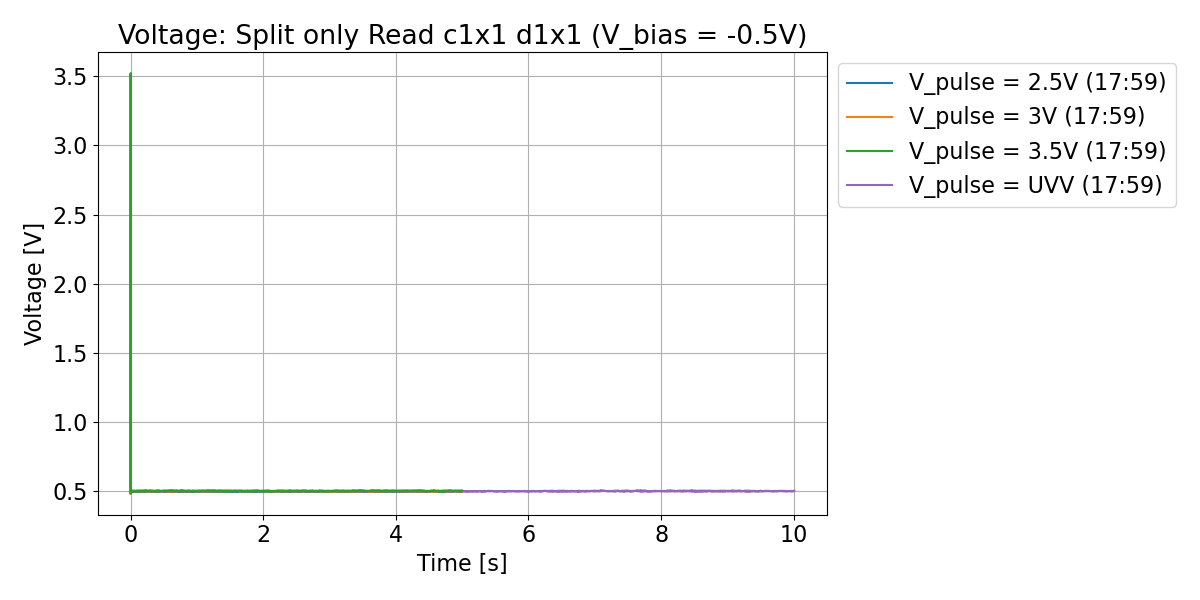

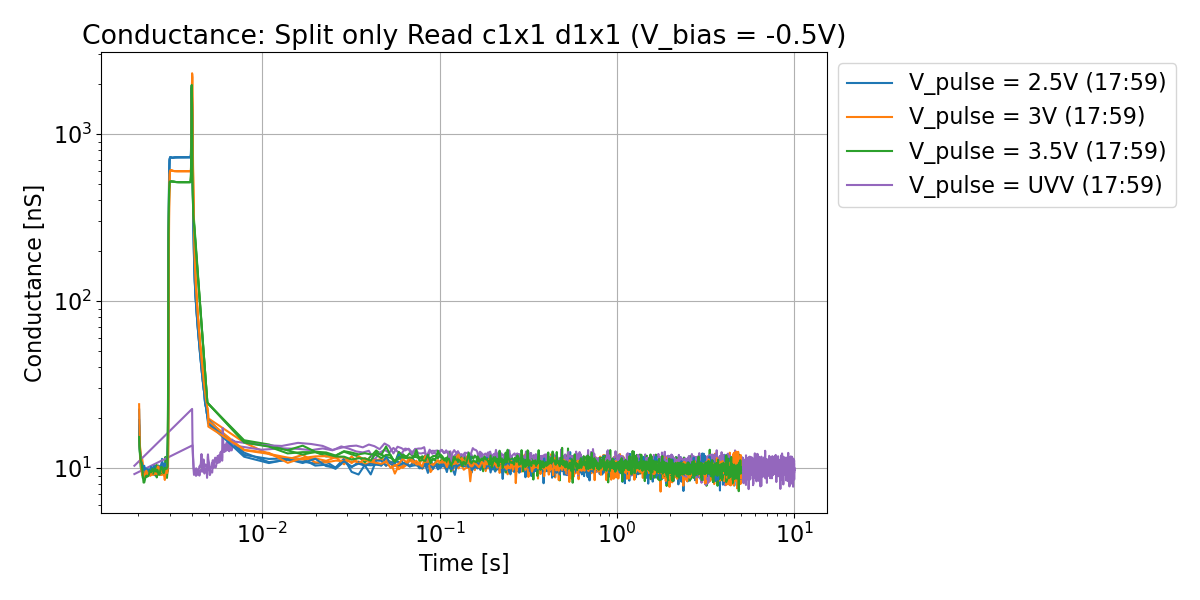

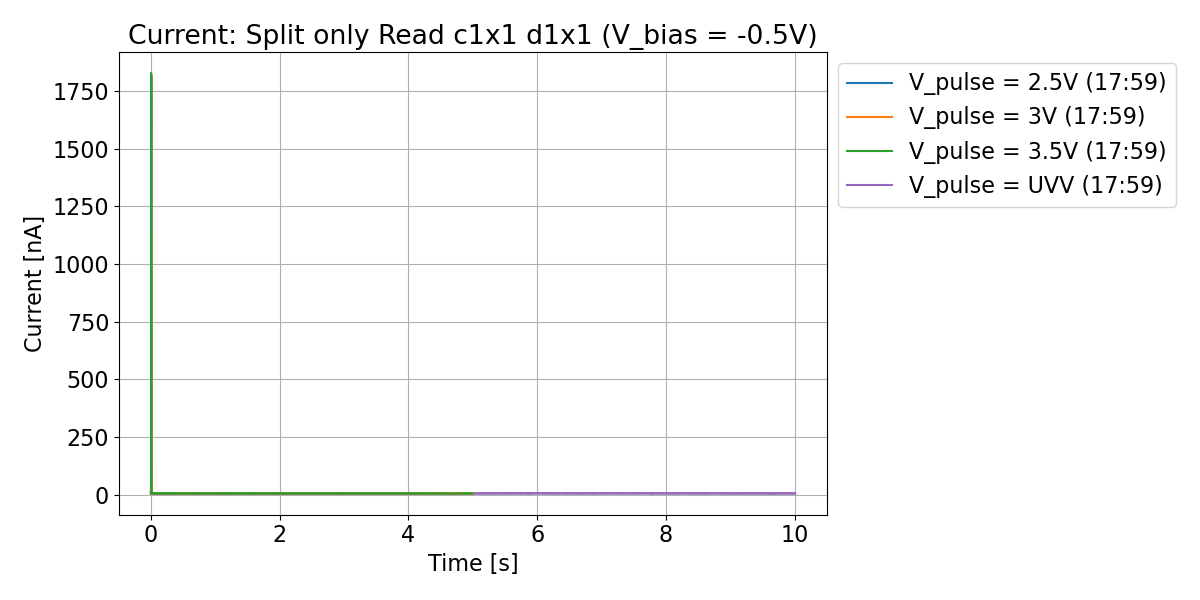

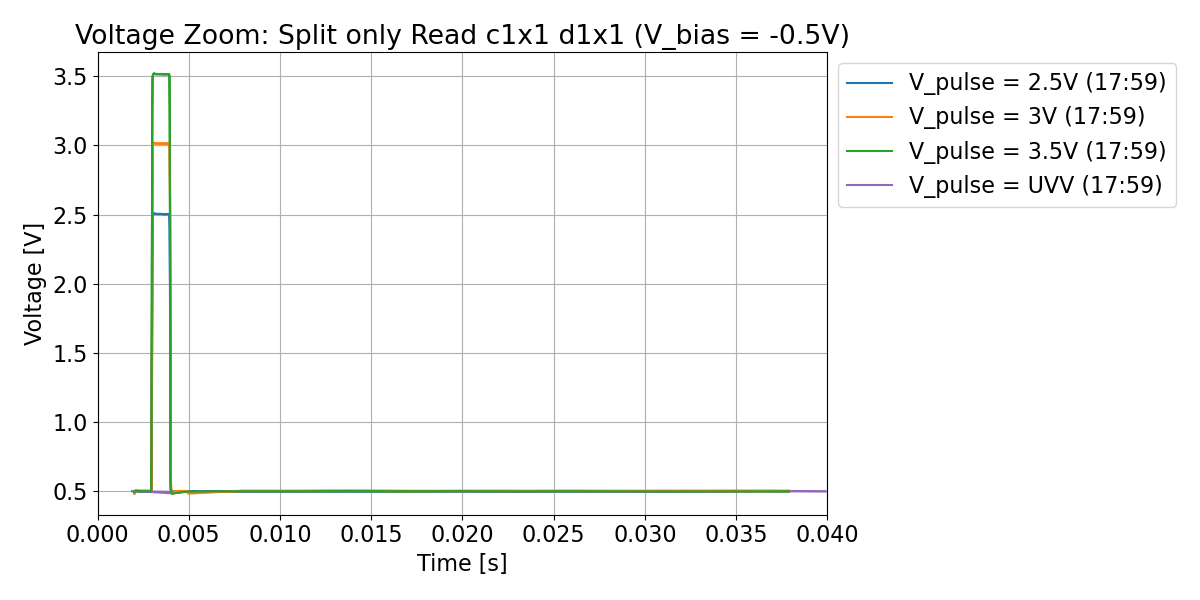

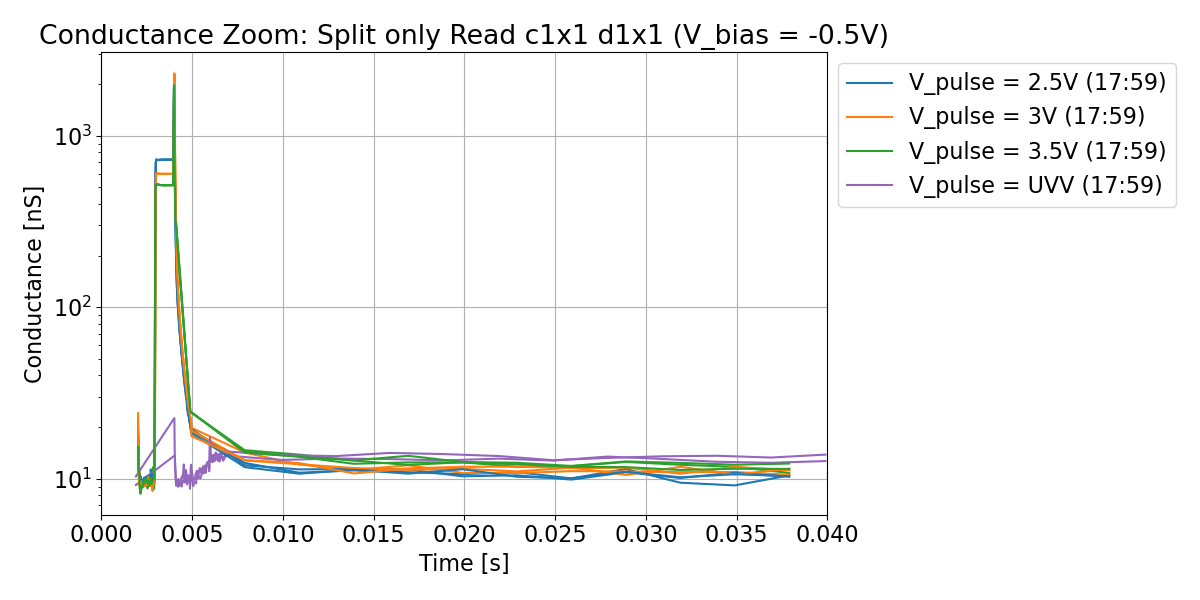

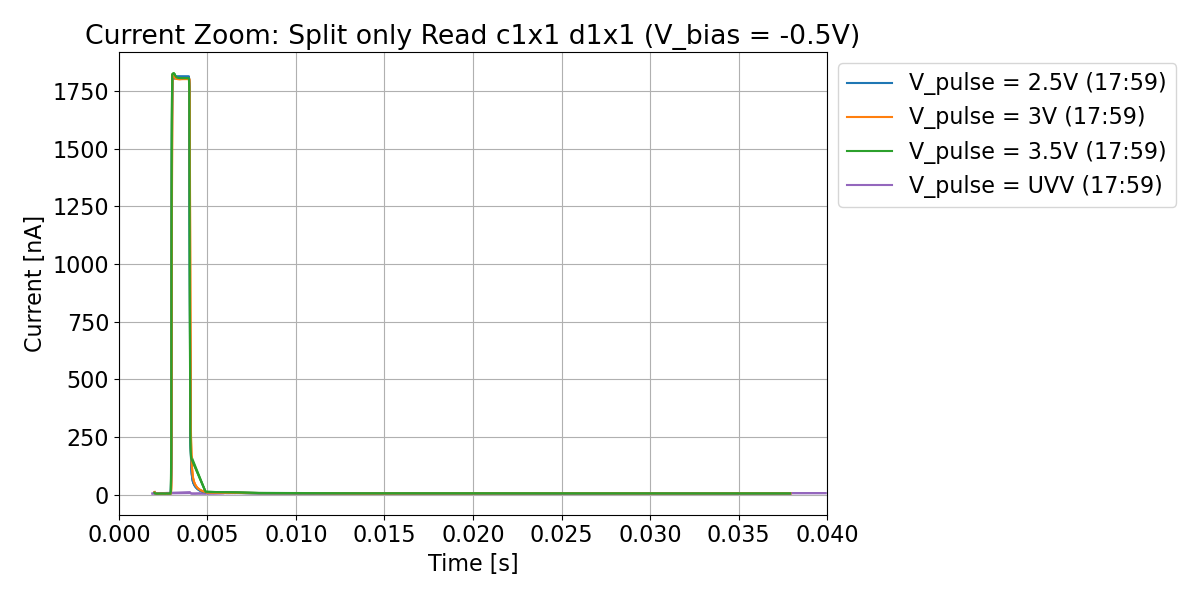

In [119]:
plt.close('all')

figures = []
figure_names = []
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    for spec in figure_specs:
        figsize_labelled = list(figsize)
        figsize_labelled[0] = figsize[0] * (1+figsize_factor*int(legend_pos == 'outside'))
        if spec['no_labels']:
            fig, axs = plt.subplots(1,1, figsize=figsize)
        else:
            fig, axs = plt.subplots(1,1, figsize=figsize_labelled)
        
        for i, idx in enumerate(plot_selection):
            m = an.measurements[idx]
            data = m['data'].iloc[::interleave]      
            x = data[spec['x_axis']]
            y = data[spec['y_axis']]
            if 'abs' in spec and spec['abs']:
                y = y.abs()
            if spec['xlim'].size:
                mask = (x >= spec['xlim'][0]) & (x <= spec['xlim'][1])
                x = x[mask]
                y = y[mask]
    
            color = color_map(cmap, i)
            if max_legend_entries is None or i < max_legend_entries:
                label = _parse_template(m, spec['legend_template'])
            else:
                label = '_no_label_'
            y_factor = spec['yfactor']
            axs.plot(x, y*y_factor, color=color, linestyle=linestyle_map[i], label=label);


        axs.set_xscale(spec['xscale'])
        axs.set_yscale(spec['yscale'])

        if spec['xlim'].size:
            axs.set_xlim(tuple(spec['xlim']))
        if spec['ylim'].size:
            axs.set_ylim(tuple(spec['ylim'] * y_factor))


        name = _parse_template(an.measurements[plot_selection[0]], spec['title'])
        figure_names.append(name)
        if not spec['no_labels']:
            legend_kwargs = {}
            if legend_pos == 'outside':
                legend_kwargs['bbox_to_anchor'] = (1,1)
                legend_kwargs['loc'] = 'upper left'
            else:
                legend_kwargs['loc'] = legend_pos
            
            if legend_labels:
                axs.legend(legend_labels, **legend_kwargs)
            else:
                axs.legend(**legend_kwargs)
                
            axs.set_xlabel(spec['x_axis'] + ' ' + units[spec['x_axis']])
            axs.set_ylabel(spec['y_axis'] + ' ' + units[spec['y_axis']])
            axs.set_title(name)
            axs.grid()

        
       
        
        fig.tight_layout()
        figures.append(fig)

### Save figures 

In [121]:
savenames = figure_names
savenames

['Voltage: Split only Read c1x1 d1x1 (V_bias = -0.5V)',
 'Conductance: Split only Read c1x1 d1x1 (V_bias = -0.5V)',
 'Current: Split only Read c1x1 d1x1 (V_bias = -0.5V)',
 'Voltage Zoom: Split only Read c1x1 d1x1 (V_bias = -0.5V)',
 'Conductance Zoom: Split only Read c1x1 d1x1 (V_bias = -0.5V)',
 'Current Zoom: Split only Read c1x1 d1x1 (V_bias = -0.5V)']

In [122]:
# savenames = figure_names
# subdirectory = 'clean'
# save_figures(figures, figure_specs, savenames, directory, subdirectory=subdirectory, filetype='pdf')

/baltic/users/optolabdata/Experiments/ChristophWeilenmann/2024-08-20_cleansweep_8_first_pulses/clean/Voltage_Split_only_Read_c1x1_d1x1_V_bias_=_-0_5V
/baltic/users/optolabdata/Experiments/ChristophWeilenmann/2024-08-20_cleansweep_8_first_pulses/clean/Conductance_Split_only_Read_c1x1_d1x1_V_bias_=_-0_5V_xlog_ylog
/baltic/users/optolabdata/Experiments/ChristophWeilenmann/2024-08-20_cleansweep_8_first_pulses/clean/Current_Split_only_Read_c1x1_d1x1_V_bias_=_-0_5V
/baltic/users/optolabdata/Experiments/ChristophWeilenmann/2024-08-20_cleansweep_8_first_pulses/clean/Voltage_Zoom_Split_only_Read_c1x1_d1x1_V_bias_=_-0_5V_x=0E+00_to_4E-02
/baltic/users/optolabdata/Experiments/ChristophWeilenmann/2024-08-20_cleansweep_8_first_pulses/clean/Conductance_Zoom_Split_only_Read_c1x1_d1x1_V_bias_=_-0_5V_ylog_x=0E+00_to_4E-02
/baltic/users/optolabdata/Experiments/ChristophWeilenmann/2024-08-20_cleansweep_8_first_pulses/clean/Current_Zoom_Split_only_Read_c1x1_d1x1_V_bias_=_-0_5V_x=0E+00_to_4E-02


# Plot same bias only during Read and scaled

In [120]:
selection = selection
selection = [5]

chosen_sel = 'normal'
chosen_sel = 'split_selections'
chosen_sel = 'triggered_selections'
chosen_sel = 'scaled_selections'
#chosen_sel = 'mov_avg_selections'

In [121]:
choose_split = True
split_idces = list(range(1, 13)) # All pulses bias -0.8
# split_idces = list(range(13, 25)) # All pulses bias 0.8
# split_idces = list(range(25, 37)) # All pulses bias -0.4
# split_idces = list(range(37, 49)) # All pulses bias 0.4
# split_idces = list(range(49, 61)) # All pulses bias 0

plot_selection = []

for idx in selection:
    man_sel = an.manipulated_selections[chosen_sel][idx]
    if choose_split:
        man_sel = [s for i,s in enumerate(man_sel) if i in split_idces]
        
    plot_selection += man_sel

In [122]:
print(plot_selection)

['5_split_1_trig_trig_scaled', '5_split_2_trig_trig_scaled', '5_split_3_trig_trig_scaled', '5_split_4_trig_trig_scaled', '5_split_5_trig_trig_scaled', '5_split_6_trig_trig_scaled', '5_split_7_trig_trig_scaled', '5_split_8_trig_trig_scaled', '5_split_9_trig_trig_scaled', '5_split_10_trig_trig_scaled', '5_split_11_trig_trig_scaled', '5_split_12_trig_trig_scaled']


### Plot Setup 

In [123]:
# Data Range
interleave = 1

xlim = [0, 0.04]

y_factor = 1e9

In [124]:
# Plot Design
figsize = (8,6)

figsize_factor = 0.5

font = {'weight' : 'normal',
        'size'   : 16}
        
plt.rc('font', **font)

cmap = plt.cm.get_cmap('tab10')
colors = plt.cm.hsv(np.linspace(0,1,4))

def color_map(cmap, i):
    # mapping = list(range(10))
    # mapping = [2, 3, 2, 3]
    mapping = [0,1,2,4,0,1,2,4,0,1,2,4]
    #mapping = None
    if mapping is None or int(i) >= len(mapping):
        return cmap(int(i)%10)
    elif type(mapping[int(i)]) is int:     
        return cmap(mapping[int(i)])
    else:
        return mapping[int(i)]

# def color_map(cmap, i):
#     return colors[i]


linestyle_map = ['-']*100
#linestyle_map = ['--', '--', '-', '-', '-', '--', '-', '--', '-', '--']

/tmp/ipykernel_590131/3648187332.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10')


In [125]:
# Labels
no_labels = False

title_template = 'Split only Read, scaled {cluster} {device} (V_bias = {V_bias}V)'
#title_template = 'DC'

units = {'Conductance': '[nS]', 'Time': '[s]', 'Voltage': '[V]', 'Current': '[nA]'}


legend_template = 'V_pulse = {V_pulse}V ({timestamp:%H:%M})'

legend_labels = []

max_legend_entries = 4

legend_pos = 'outside'
#legend_pos = 'best'
#legend_pos = 'upper right'



In [126]:
# Figure specification
figure_specs = [
    {
        'title': 'Voltage: ' + title_template,
        'x_axis': 'Time',
        'y_axis': 'Voltage',
        'abs': False,
        'xscale': 'linear',
        'yscale': 'linear',
        'xlim': np.array([]),
        'ylim': np.array([]),
        'yfactor': 1,
        'legend_template': legend_template,
        'no_labels': no_labels
    },
    {
        'title': 'Conductance: ' + title_template,
        'x_axis': 'Time',
        'y_axis': 'Conductance',
        'abs': False,
        'xscale': 'linear',
        'yscale': 'log',
        'xlim': np.array([]),
        'ylim': np.array([]), #[9e-9, 30e-9]
        'yfactor': y_factor,
        'legend_template': legend_template,
        'no_labels': no_labels
    },
    {
        'title': 'Current: ' + title_template,
        'x_axis': 'Time',
        'y_axis': 'Current',
        'abs': False,
        'xscale': 'linear',
        'yscale': 'linear',
        'xlim': np.array([]),
        'ylim': np.array([]), # [4e-9, 20e-9]
        'yfactor': y_factor,
        'legend_template': legend_template,
        'no_labels': no_labels
    },    
    {
        'title': 'Voltage Zoom: ' + title_template,
        'x_axis': 'Time',
        'y_axis': 'Voltage',
        'abs': False,
        'xscale': 'linear',
        'yscale': 'linear',
        'xlim': np.array(xlim),
        'ylim': np.array([]),
        'yfactor': 1,
        'legend_template': legend_template,
        'no_labels': no_labels
    },
    {
        'title': 'Conductance Zoom: ' + title_template,
        'x_axis': 'Time',
        'y_axis': 'Conductance',
        'abs': False,
        'xscale': 'linear',
        'yscale': 'log',
        'xlim': np.array(xlim),
        'ylim': np.array([]), #[9e-9, 30e-9]
        'yfactor': y_factor,
        'legend_template': legend_template,
        'no_labels': no_labels
    },
    {
        'title': 'Current Zoom: ' + title_template,
        'x_axis': 'Time',
        'y_axis': 'Current',
        'abs': False,
        'xscale': 'linear',
        'yscale': 'linear',
        'xlim': np.array(xlim),
        'ylim': np.array([]), # [4e-9, 20e-9]
        'yfactor': y_factor,
        'legend_template': legend_template,
        'no_labels': no_labels
    },    
]   

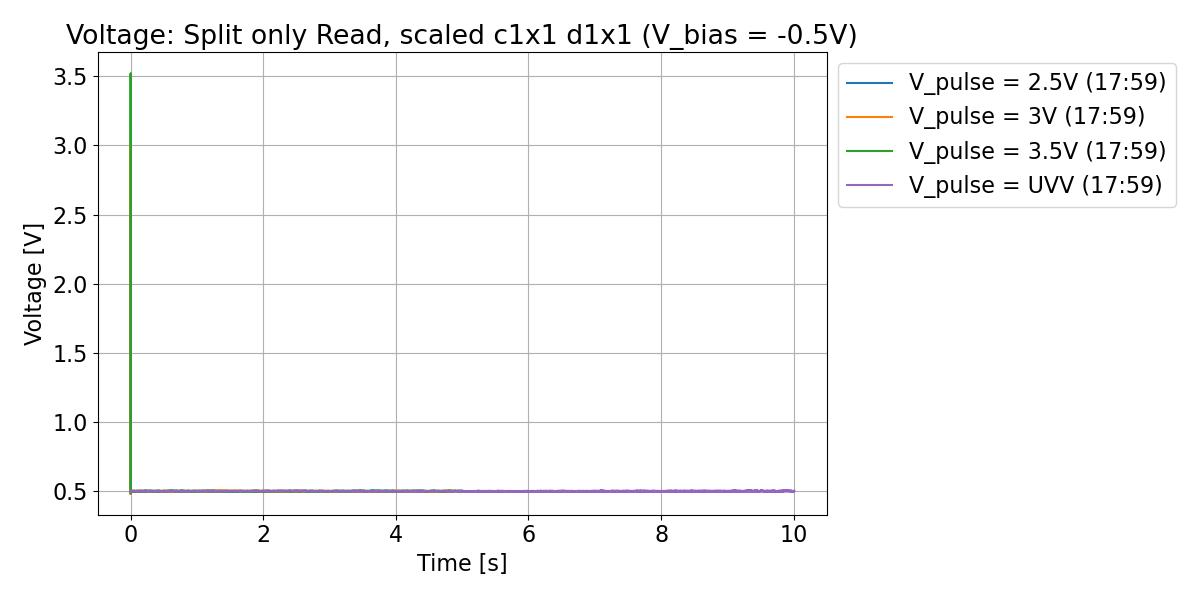

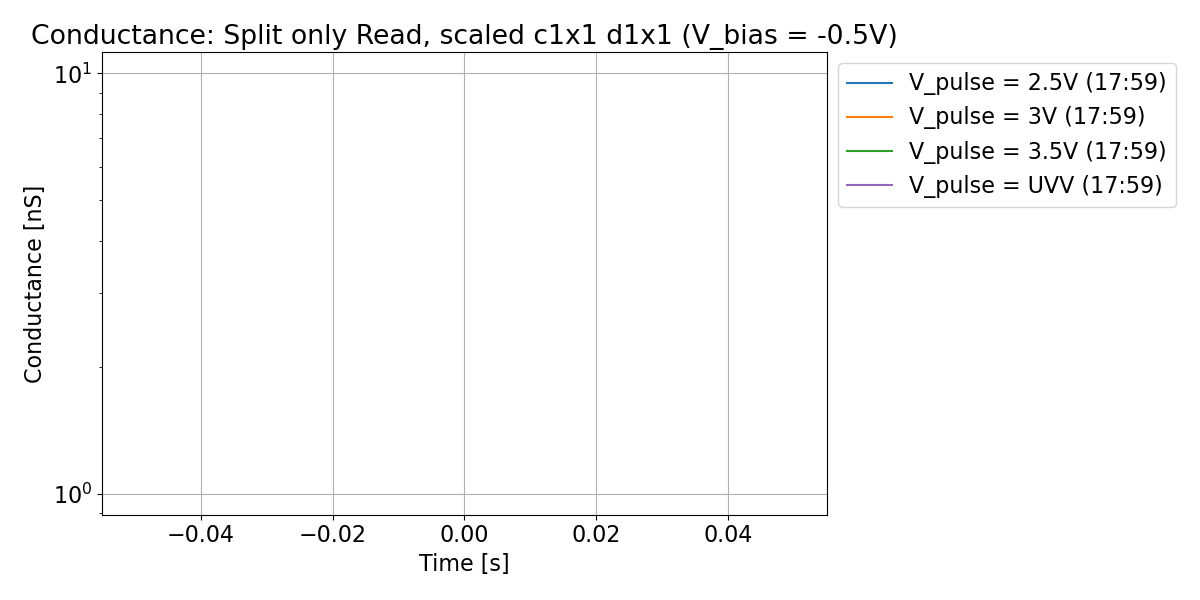

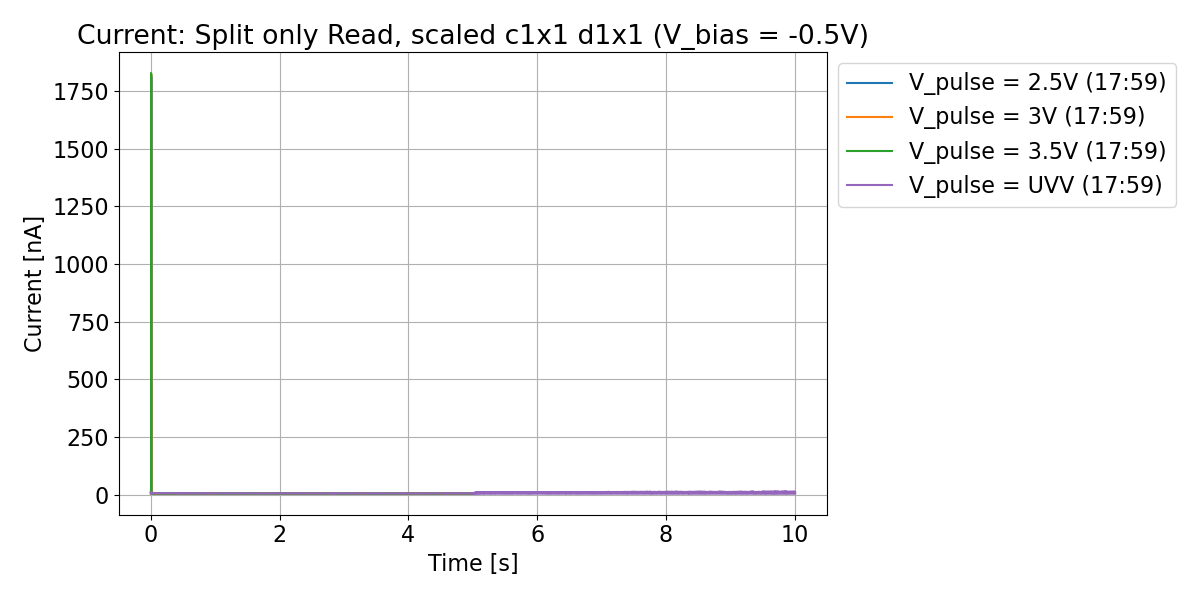

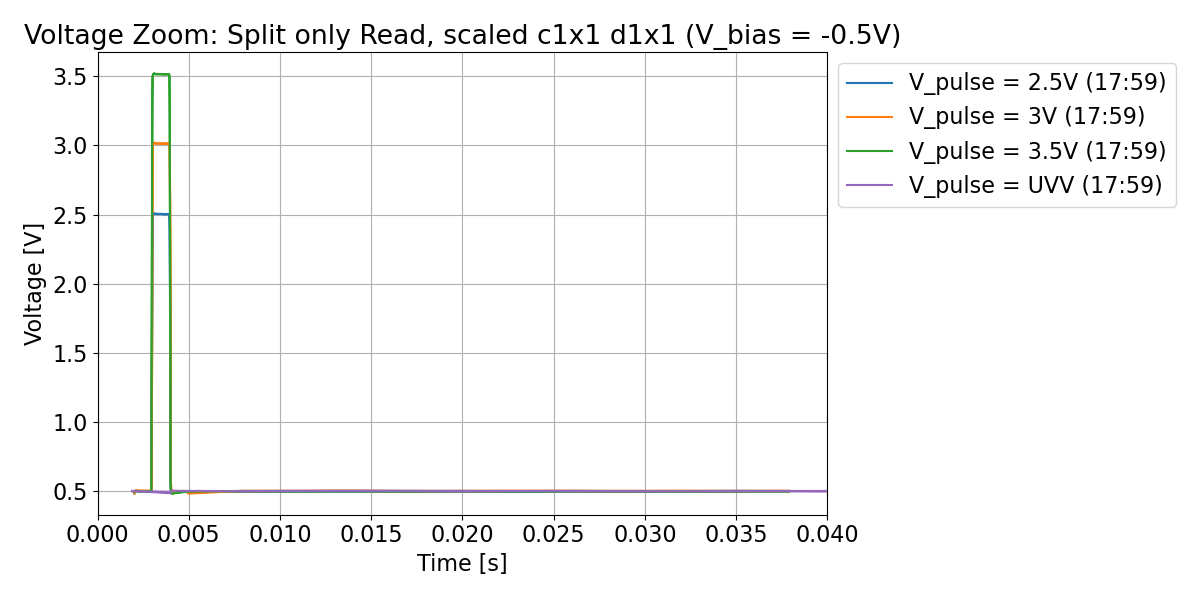

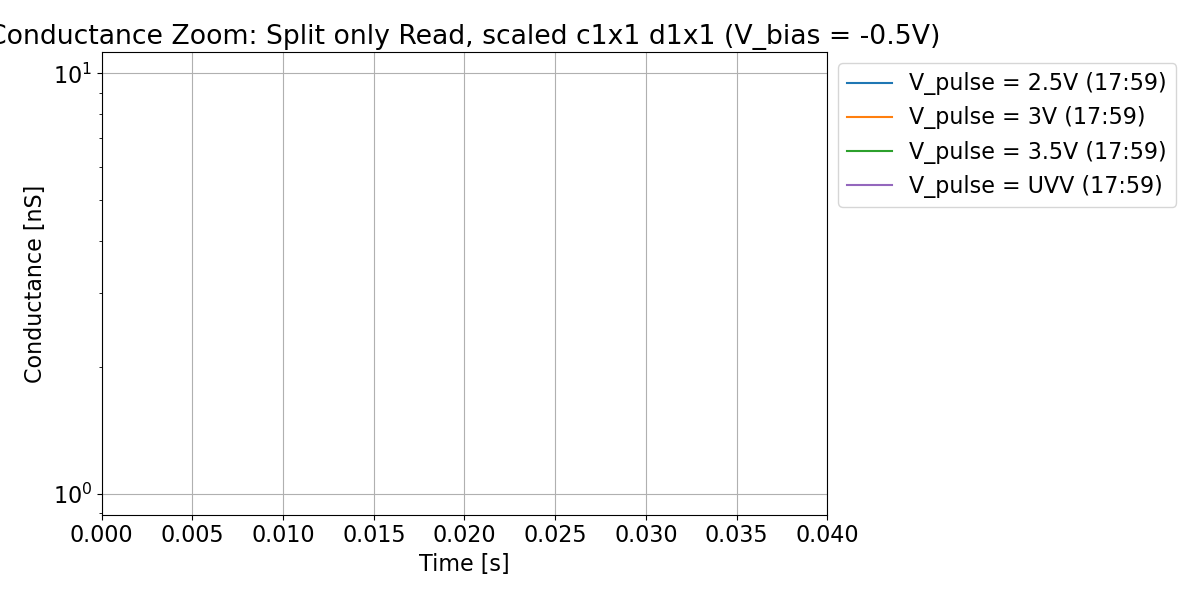

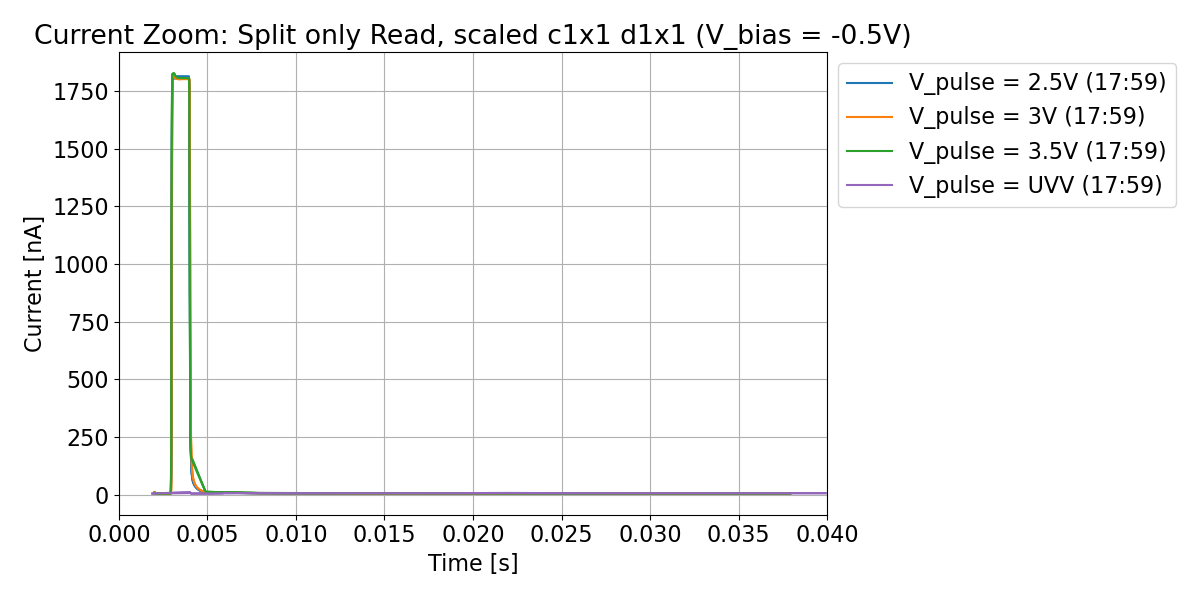

In [127]:
plt.close('all')

figures = []
figure_names = []
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    for spec in figure_specs:
        figsize_labelled = list(figsize)
        figsize_labelled[0] = figsize[0] * (1+figsize_factor*int(legend_pos == 'outside'))
        if spec['no_labels']:
            fig, axs = plt.subplots(1,1, figsize=figsize)
        else:
            fig, axs = plt.subplots(1,1, figsize=figsize_labelled)
        
        for i, idx in enumerate(plot_selection):
            m = an.measurements[idx]
            data = m['data'].iloc[::interleave]      
            x = data[spec['x_axis']]
            y = data[spec['y_axis']]
            if 'abs' in spec and spec['abs']:
                y = y.abs()
            if spec['xlim'].size:
                mask = (x >= spec['xlim'][0]) & (x <= spec['xlim'][1])
                x = x[mask]
                y = y[mask]
    
            color = color_map(cmap, i)
            if max_legend_entries is None or i < max_legend_entries:
                label = _parse_template(m, spec['legend_template'])
            else:
                label = '_no_label_'
            y_factor = spec['yfactor']
            axs.plot(x, y*y_factor, color=color, linestyle=linestyle_map[i], label=label);


        axs.set_xscale(spec['xscale'])
        axs.set_yscale(spec['yscale'])

        if spec['xlim'].size:
            axs.set_xlim(tuple(spec['xlim']))
        if spec['ylim'].size:
            axs.set_ylim(tuple(spec['ylim'] * y_factor))


        name = _parse_template(an.measurements[plot_selection[0]], spec['title'])
        figure_names.append(name)
        if not spec['no_labels']:
            legend_kwargs = {}
            if legend_pos == 'outside':
                legend_kwargs['bbox_to_anchor'] = (1,1)
                legend_kwargs['loc'] = 'upper left'
            else:
                legend_kwargs['loc'] = legend_pos
            
            if legend_labels:
                axs.legend(legend_labels, **legend_kwargs)
            else:
                axs.legend(**legend_kwargs)
                
            axs.set_xlabel(spec['x_axis'] + ' ' + units[spec['x_axis']])
            axs.set_ylabel(spec['y_axis'] + ' ' + units[spec['y_axis']])
            axs.set_title(name)
            axs.grid()

        
       
        
        fig.tight_layout()
        figures.append(fig)

### Save figures 

In [87]:
# savenames = figure_names
# subdirectory = 'clean'
# save_figures(figures, figure_specs, savenames, directory, subdirectory=subdirectory, filetype='pdf')

/baltic/users/optolabdata/Experiments/ChristophWeilenmann/2024-08-20_cleansweep_8_first_pulses/clean/Voltage_Split_only_Read__scaled_c1x1_d1x1_V_bias_=_-0_5V
Should file be overwritten: yes[y] / no [n] / no to all [nn] / yes to all [yy] / rename [r] / rename all [rr]:


# Plot different biases 

In [128]:
selection = selection
selection = [5]

chosen_sel = 'normal'
chosen_sel = 'split_selections'
chosen_sel = 'triggered_selections'
chosen_sel = 'scaled_selections'
#chosen_sel = 'mov_avg_selections'

In [129]:
choose_split = True
#split_idces = list(range(1, 58, 4)) # V_pulse = 3V
# split_idces = list(range(2, 59, 4)) # V_pulse = 4V
split_idces = list(range(3, 60, 4)) # V_pulse = 5V
#split_idces = list(range(4, 61, 4)) # UV pulse


plot_selection = []

for idx in selection:
    man_sel = an.manipulated_selections[chosen_sel][idx]
    if choose_split:
        man_sel = [s for i,s in enumerate(man_sel) if i in split_idces]
        
    plot_selection += man_sel

In [105]:
print(plot_selection)

['5_split_3_trig_scaled', '5_split_7_trig_scaled', '5_split_11_trig_scaled', '5_split_15_trig_scaled', '5_split_19_trig_scaled', '5_split_23_trig_scaled', '5_split_27_trig_scaled', '5_split_31_trig_scaled', '5_split_35_trig_scaled', '5_split_39_trig_scaled', '5_split_43_trig_scaled', '5_split_47_trig_scaled', '5_split_51_trig_scaled', '5_split_55_trig_scaled', '5_split_59_trig_scaled']


### Plot Setup 

In [106]:
# Data Range
interleave = 1

xlim = [0, 0.04]

y_factor = 1e9

In [107]:
# Plot Design
figsize = (8,6)

figsize_factor = 0.5

font = {'weight' : 'normal',
        'size'   : 16}
        
plt.rc('font', **font)

cmap = plt.cm.get_cmap('tab10')
def color_map(cmap, i):
    # mapping = list(range(10))
    # mapping = [2, 3, 2, 3]
    mapping = [0,0,0,1,1,1,2,2,2,3,3,3,4,4,4]
    #mapping = None
    if mapping is None or int(i) >= len(mapping):
        return cmap(int(i)%10)
    elif type(mapping[int(i)]) is int:     
        return cmap(mapping[int(i)])
    else:
        return mapping[int(i)]

# def color_map(cmap, i):
#     return colors[i]


linestyle_map = ['-']*100
#linestyle_map = ['--', '--', '-', '-', '-', '--', '-', '--', '-', '--']

/tmp/ipykernel_578787/2585133962.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10')


In [108]:
# Labels
no_labels = False

title_template = 'Split only Read, scaled {cluster} {device} (V_pulse = {V_pulse}V)'
#title_template = 'DC'

units = {'Conductance': '[nS]', 'Time': '[s]', 'Voltage': '[V]', 'Current': '[nA]'}


legend_template = 'V_bias = {V_bias}V ({timestamp:%H:%M})'

legend_labels = []

max_legend_entries = None

legend_pos = 'outside'
#legend_pos = 'best'
#legend_pos = 'upper right'



In [109]:
# Figure specification
figure_specs = [
    {
        'title': 'Voltage: ' + title_template,
        'x_axis': 'Time',
        'y_axis': 'Voltage',
        'abs': False,
        'xscale': 'linear',
        'yscale': 'linear',
        'xlim': np.array([]),
        'ylim': np.array([]),
        'yfactor': 1,
        'legend_template': legend_template,
        'no_labels': no_labels
    },
    {
        'title': 'Conductance: ' + title_template,
        'x_axis': 'Time',
        'y_axis': 'Conductance',
        'abs': False,
        'xscale': 'log',
        'yscale': 'log',
        'xlim': np.array([1e-3, 5.5]),
        'ylim': np.array([9e-9, 22e-9]), #[9e-9, 30e-9]
        'yfactor': y_factor,
        'legend_template': legend_template,
        'no_labels': no_labels
    },
    {
        'title': 'Current: ' + title_template,
        'x_axis': 'Time',
        'y_axis': 'Current',
        'abs': False,
        'xscale': 'linear',
        'yscale': 'linear',
        'xlim': np.array([]),
        'ylim': np.array([]), # [4e-9, 20e-9]
        'yfactor': y_factor,
        'legend_template': legend_template,
        'no_labels': no_labels
    },    
    {
        'title': 'Voltage Zoom: ' + title_template,
        'x_axis': 'Time',
        'y_axis': 'Voltage',
        'abs': False,
        'xscale': 'linear',
        'yscale': 'linear',
        'xlim': np.array(xlim),
        'ylim': np.array([]),
        'yfactor': 1,
        'legend_template': legend_template,
        'no_labels': no_labels
    },
    {
        'title': 'Conductance Zoom: ' + title_template,
        'x_axis': 'Time',
        'y_axis': 'Conductance',
        'abs': False,
        'xscale': 'linear',
        'yscale': 'log',
        'xlim': np.array(xlim),
        'ylim': np.array([]), #[9e-9, 30e-9]
        'yfactor': y_factor,
        'legend_template': legend_template,
        'no_labels': no_labels
    },
    {
        'title': 'Current Zoom: ' + title_template,
        'x_axis': 'Time',
        'y_axis': 'Current',
        'abs': False,
        'xscale': 'linear',
        'yscale': 'linear',
        'xlim': np.array(xlim),
        'ylim': np.array([]), # [4e-9, 20e-9]
        'yfactor': y_factor,
        'legend_template': legend_template,
        'no_labels': no_labels
    },    
]   

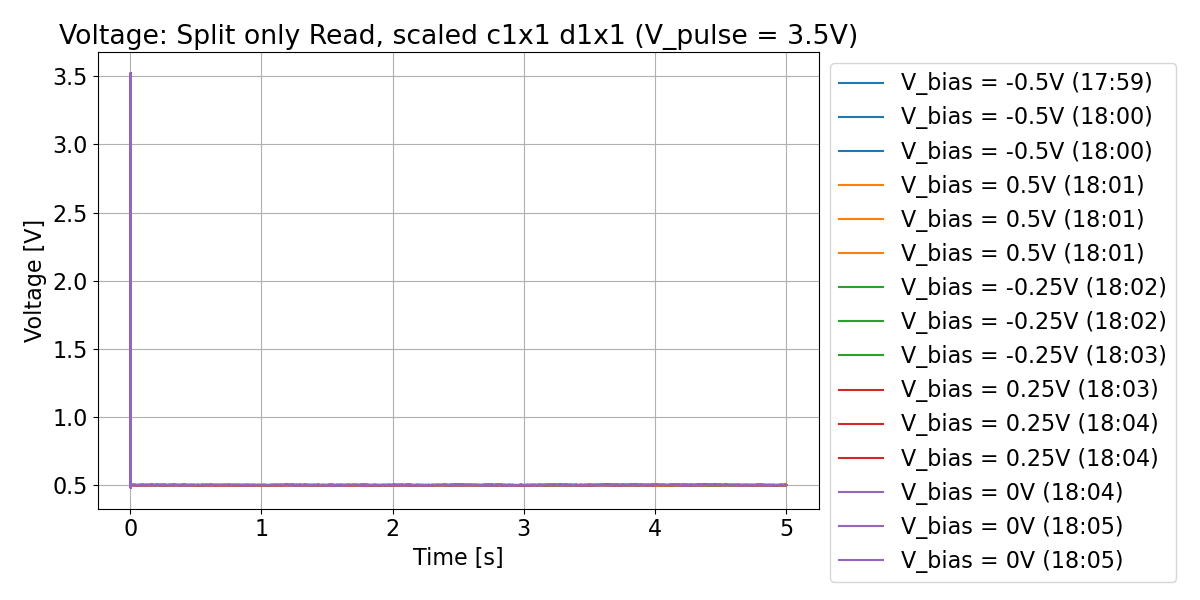

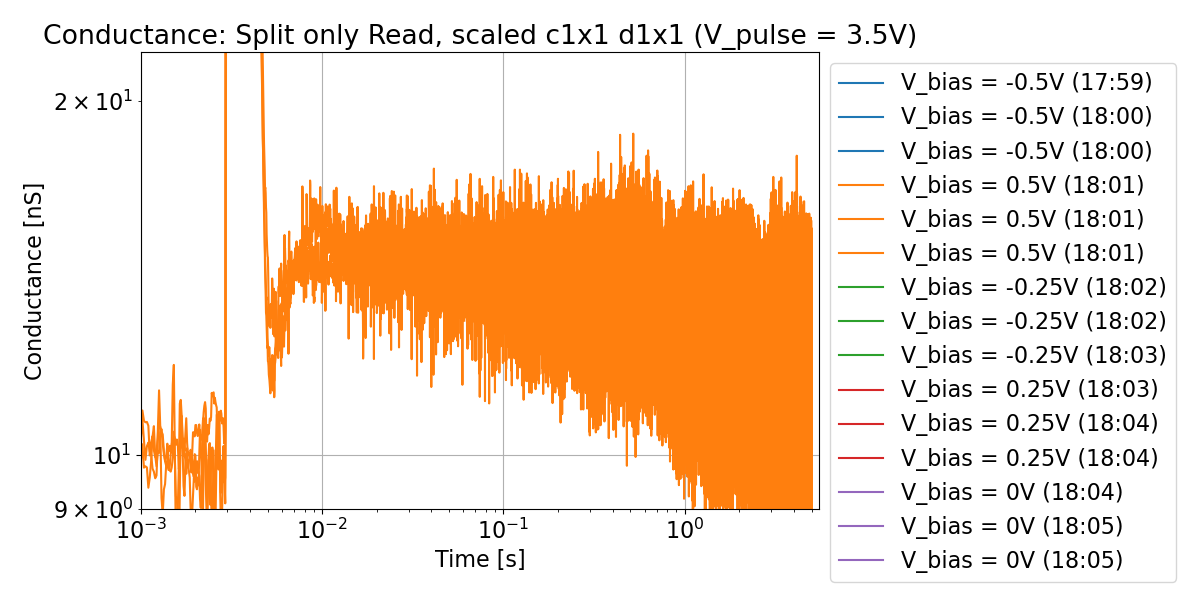

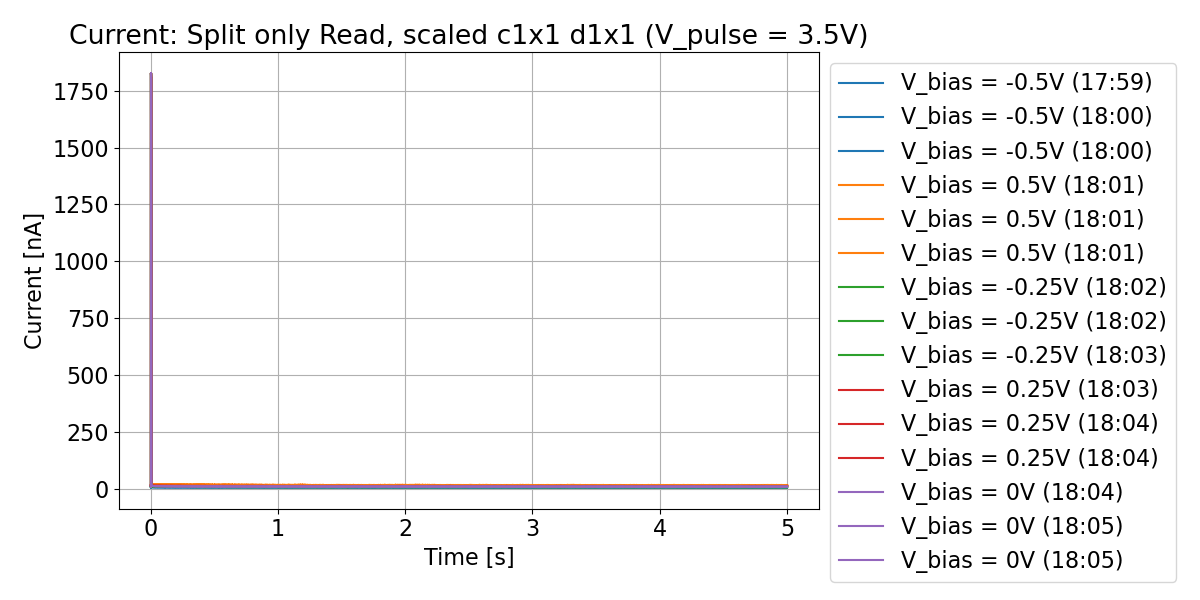

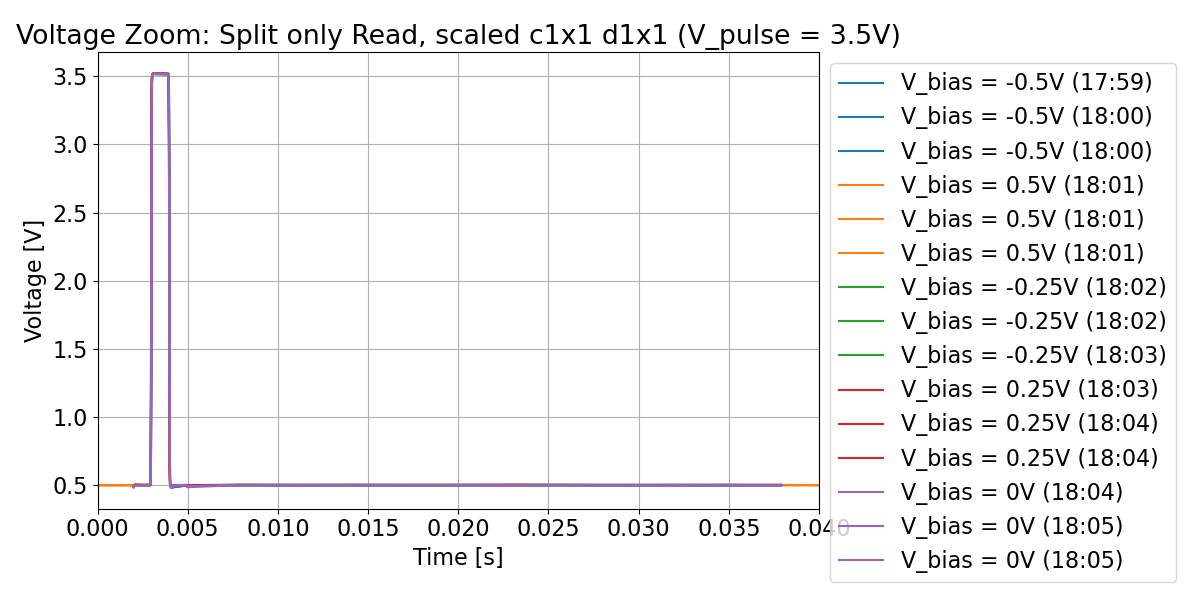

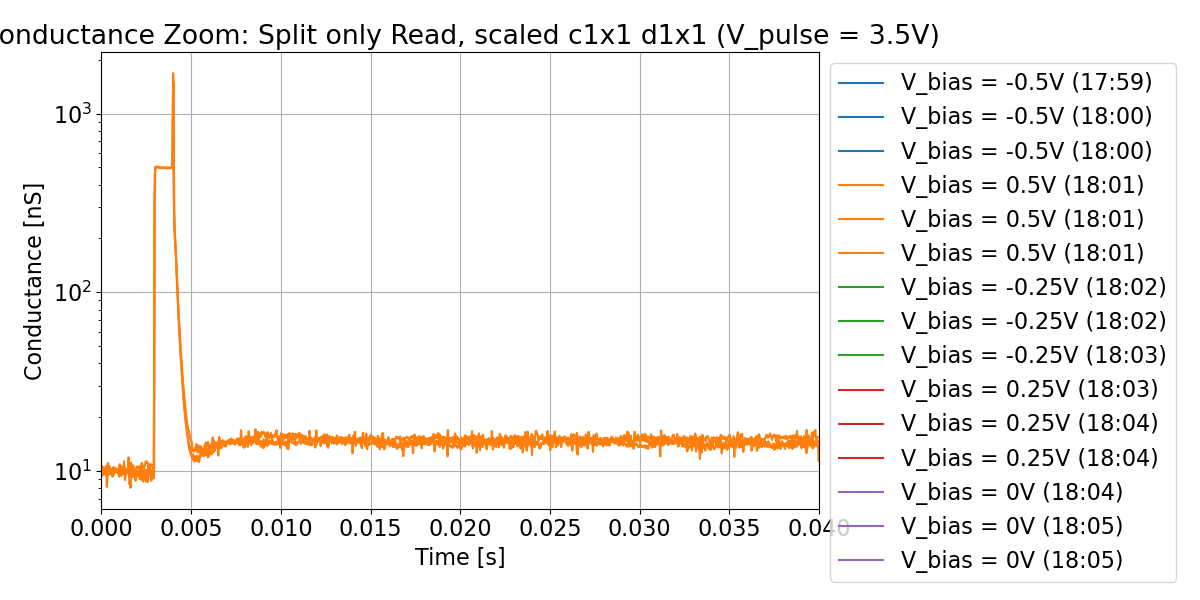

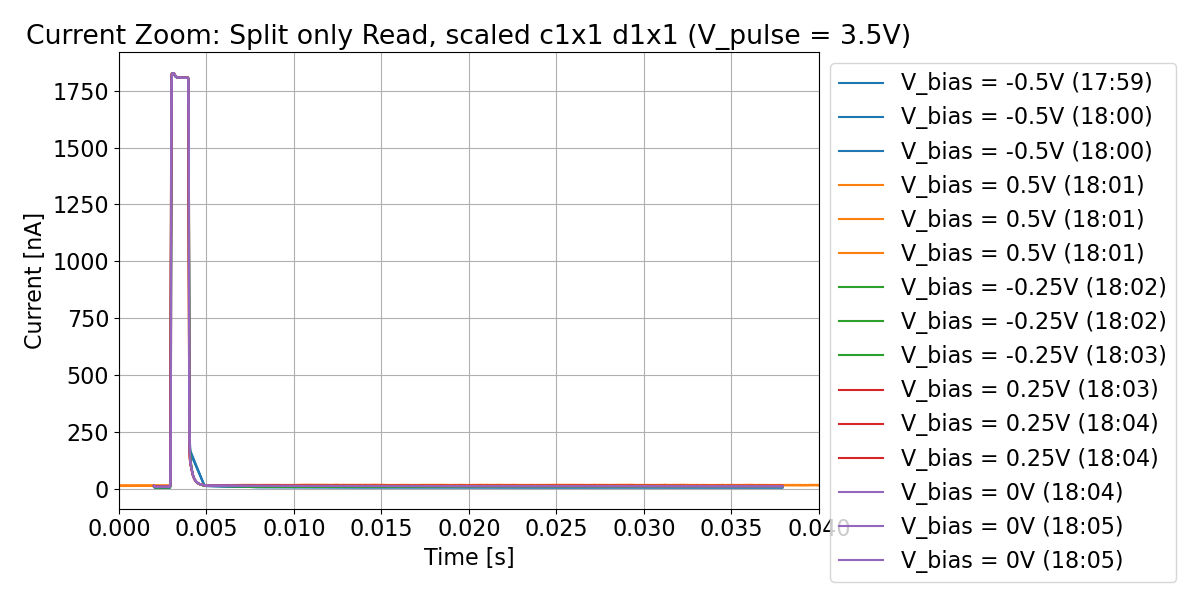

In [110]:
plt.close('all')

figures = []
figure_names = []
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    for spec in figure_specs:
        figsize_labelled = list(figsize)
        figsize_labelled[0] = figsize[0] * (1+figsize_factor*int(legend_pos == 'outside'))
        if spec['no_labels']:
            fig, axs = plt.subplots(1,1, figsize=figsize)
        else:
            fig, axs = plt.subplots(1,1, figsize=figsize_labelled)
        
        for i, idx in enumerate(plot_selection):
            m = an.measurements[idx]
            data = m['data'].iloc[::interleave]      
            x = data[spec['x_axis']]
            y = data[spec['y_axis']]
            if 'abs' in spec and spec['abs']:
                y = y.abs()
            if spec['xlim'].size:
                mask = (x >= spec['xlim'][0]) & (x <= spec['xlim'][1])
                x = x[mask]
                y = y[mask]
    
            color = color_map(cmap, i)
            if max_legend_entries is None or i < max_legend_entries:
                label = _parse_template(m, spec['legend_template'])
            else:
                label = '_no_label_'
            y_factor = spec['yfactor']
            axs.plot(x, y*y_factor, color=color, linestyle=linestyle_map[i], label=label);


        axs.set_xscale(spec['xscale'])
        axs.set_yscale(spec['yscale'])

        if spec['xlim'].size:
            axs.set_xlim(tuple(spec['xlim']))
        if spec['ylim'].size:
            axs.set_ylim(tuple(spec['ylim'] * y_factor))


        name = _parse_template(an.measurements[plot_selection[0]], spec['title'])
        figure_names.append(name)
        if not spec['no_labels']:
            legend_kwargs = {}
            if legend_pos == 'outside':
                legend_kwargs['bbox_to_anchor'] = (1,1)
                legend_kwargs['loc'] = 'upper left'
            else:
                legend_kwargs['loc'] = legend_pos
            
            if legend_labels:
                axs.legend(legend_labels, **legend_kwargs)
            else:
                axs.legend(**legend_kwargs)
                
            axs.set_xlabel(spec['x_axis'] + ' ' + units[spec['x_axis']])
            axs.set_ylabel(spec['y_axis'] + ' ' + units[spec['y_axis']])
            axs.set_title(name)
            axs.grid()

        
       
        
        fig.tight_layout()
        figures.append(fig)

### Save figures 

In [140]:
savenames = figure_names
subdirectory = 'clean'
save_figures(figures, figure_specs, savenames, directory, subdirectory=subdirectory, filetype='pdf')

/baltic/users/optolabdata/Experiments/ChristophWeilenmann/2024-08-20_cleansweep_8_first_pulses/clean/Voltage_Split_only_Read__scaled_c1x1_d1x1_V_pulse_=_3_5V
/baltic/users/optolabdata/Experiments/ChristophWeilenmann/2024-08-20_cleansweep_8_first_pulses/clean/Conductance_Split_only_Read__scaled_c1x1_d1x1_V_pulse_=_3_5V_xlog_ylog_x=1E-03_to_6E+00_y=9E-09_to_2E-08
/baltic/users/optolabdata/Experiments/ChristophWeilenmann/2024-08-20_cleansweep_8_first_pulses/clean/Current_Split_only_Read__scaled_c1x1_d1x1_V_pulse_=_3_5V
/baltic/users/optolabdata/Experiments/ChristophWeilenmann/2024-08-20_cleansweep_8_first_pulses/clean/Voltage_Zoom_Split_only_Read__scaled_c1x1_d1x1_V_pulse_=_3_5V_x=0E+00_to_4E-02
/baltic/users/optolabdata/Experiments/ChristophWeilenmann/2024-08-20_cleansweep_8_first_pulses/clean/Conductance_Zoom_Split_only_Read__scaled_c1x1_d1x1_V_pulse_=_3_5V_ylog_x=0E+00_to_4E-02
/baltic/users/optolabdata/Experiments/ChristophWeilenmann/2024-08-20_cleansweep_8_first_pulses/clean/Current_

# Plot different biases: mean and standard deviation

In [131]:
selection = selection
selection = [5]

chosen_sel = 'normal'
chosen_sel = 'split_selections'
chosen_sel = 'triggered_selections'
chosen_sel = 'scaled_selections'
#chosen_sel = 'mov_avg_selections'

In [141]:
choose_split = True

# # V_pulse = 3V
split_idces = [
    [1, 5, 9],
    [13, 17, 21],
    [25, 29, 33],
    [37, 41, 45],
    [49, 53, 57]
]

# # V_pulse = 4V
# split_idces = [
#     list(np.array([1, 5, 9])+1),
#     list(np.array([13, 17, 21])+1),
#     list(np.array([25, 29, 33])+1),
#     list(np.array([37, 41, 45])+1),
#     list(np.array([49, 53, 57])+1),
# ]

# V_pulse = 5V
# split_idces = [
#     list(np.array([1, 5, 9])+2),
#     list(np.array([13, 17, 21])+2),
#     list(np.array([25, 29, 33])+2),
#     list(np.array([37, 41, 45])+2),
#     list(np.array([49, 53, 57])+2),
# ]

# # V_pulse = UV
# split_idces = [
#     list(np.array([1, 5, 9])+3),
#     list(np.array([13, 17, 21])+3),
#     list(np.array([25, 29, 33])+3),
#     list(np.array([37, 41, 45])+3),
#     list(np.array([49, 53, 57])+3),
# ]


In [142]:
plot_selection = []

for idx in selection:
    man_sel = an.manipulated_selections[chosen_sel][idx]
    if choose_split:
        for spl_row in split_idces:
            sub_sel = [s for i,s in enumerate(man_sel) if i in spl_row]
            plot_selection.append(sub_sel)      
        
    

In [143]:
print(plot_selection)

[['5_split_1_trig_trig_scaled', '5_split_5_trig_trig_scaled', '5_split_9_trig_trig_scaled'], ['5_split_13_trig_trig_scaled', '5_split_17_trig_trig_scaled', '5_split_21_trig_trig_scaled'], ['5_split_25_trig_trig_scaled', '5_split_29_trig_trig_scaled', '5_split_33_trig_trig_scaled'], ['5_split_37_trig_trig_scaled', '5_split_41_trig_trig_scaled', '5_split_45_trig_trig_scaled'], ['5_split_49_trig_trig_scaled', '5_split_53_trig_trig_scaled', '5_split_57_trig_trig_scaled']]


## Calculate Mean and Std Deviation

In [144]:
selection_means, selection_stds = an.calc_errorbars(plot_selection)
selection_means

['5_5_5_split_9_trig_trig_scaled_mean',
 '5_5_5_split_21_trig_trig_scaled_mean',
 '5_5_5_split_33_trig_trig_scaled_mean',
 '5_5_5_split_45_trig_trig_scaled_mean',
 '5_5_5_split_57_trig_trig_scaled_mean']

### Plot Setup 

In [145]:
# Data Range
interleave = 1

xlim = [0, 0.04]

y_factor = 1e9

In [146]:
# Plot Design
figsize = (8,6)

figsize_factor = 0.5

font = {'weight' : 'normal',
        'size'   : 16}
        
plt.rc('font', **font)

cmap = plt.cm.get_cmap('tab10')
def color_map(cmap, i):
    # mapping = list(range(10))
    # mapping = [2, 3, 2, 3]
    mapping = [0,0,0,1,1,1,2,2,2,3,3,3,4,4,4]
    mapping = None
    if mapping is None or int(i) >= len(mapping):
        return cmap(int(i)%10)
    elif type(mapping[int(i)]) is int:     
        return cmap(mapping[int(i)])
    else:
        return mapping[int(i)]

# def color_map(cmap, i):
#     return colors[i]


linestyle_map = ['-']*100
#linestyle_map = ['--', '--', '-', '-', '-', '--', '-', '--', '-', '--']

/tmp/ipykernel_590131/3117520591.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10')


In [147]:
# Labels
no_labels = False

title_template = 'Split only Read, scaled {cluster} {device} (V_pulse = {V_pulse}V)'
#title_template = 'DC'

units = {'Conductance': '[nS]', 'Time': '[s]', 'Voltage': '[V]', 'Current': '[nA]'}


legend_template = 'V_bias = {V_bias}V ({timestamp:%H:%M})'

legend_labels = []

max_legend_entries = None

legend_pos = 'outside'
#legend_pos = 'best'
#legend_pos = 'upper right'



In [148]:
# Figure specification
figure_specs = [
    {
        'title': 'Voltage: ' + title_template,
        'x_axis': 'Time',
        'y_axis': 'Voltage',
        'abs': False,
        'xscale': 'linear',
        'yscale': 'linear',
        'xlim': np.array([]),
        'ylim': np.array([]),
        'yfactor': 1,
        'legend_template': legend_template,
        'no_labels': no_labels,
        'errorbar_plot': False
    },
    {
        'title': 'Conductance: ' + title_template,
        'x_axis': 'Time',
        'y_axis': 'Conductance',
        'abs': False,
        'xscale': 'log',
        'yscale': 'log',
        'xlim': np.array([1e-3, 5.5]),
        'ylim': np.array([9e-9, 30e-7]), #[9e-9, 30e-9]
        'yfactor': y_factor,
        'legend_template': legend_template,
        'no_labels': no_labels,
        'errorbar_plot': False
    },
    {
        'title': 'Current: ' + title_template,
        'x_axis': 'Time',
        'y_axis': 'Current',
        'abs': False,
        'xscale': 'linear',
        'yscale': 'linear',
        'xlim': np.array([]),
        'ylim': np.array([]), # [4e-9, 20e-9]
        'yfactor': y_factor,
        'legend_template': legend_template,
        'no_labels': no_labels,
        'errorbar_plot': False
    },    
    {
        'title': 'Voltage Zoom: ' + title_template,
        'x_axis': 'Time',
        'y_axis': 'Voltage',
        'abs': False,
        'xscale': 'linear',
        'yscale': 'linear',
        'xlim': np.array(xlim),
        'ylim': np.array([]),
        'yfactor': 1,
        'legend_template': legend_template,
        'no_labels': no_labels,
        'errorbar_plot': False
    },
    {
        'title': 'Conductance Zoom: ' + title_template,
        'x_axis': 'Time',
        'y_axis': 'Conductance',
        'abs': False,
        'xscale': 'linear',
        'yscale': 'log',
        'xlim': np.array(xlim),
        'ylim': np.array([]), #[9e-9, 30e-9]
        'yfactor': y_factor,
        'legend_template': legend_template,
        'no_labels': no_labels,
        'errorbar_plot': False
    },
    {
        'title': 'Current Zoom: ' + title_template,
        'x_axis': 'Time',
        'y_axis': 'Current',
        'abs': False,
        'xscale': 'linear',
        'yscale': 'linear',
        'xlim': np.array(xlim),
        'ylim': np.array([]), # [4e-9, 20e-9]
        'yfactor': y_factor,
        'legend_template': legend_template,
        'no_labels': no_labels,
        'errorbar_plot': False
    },    
]   

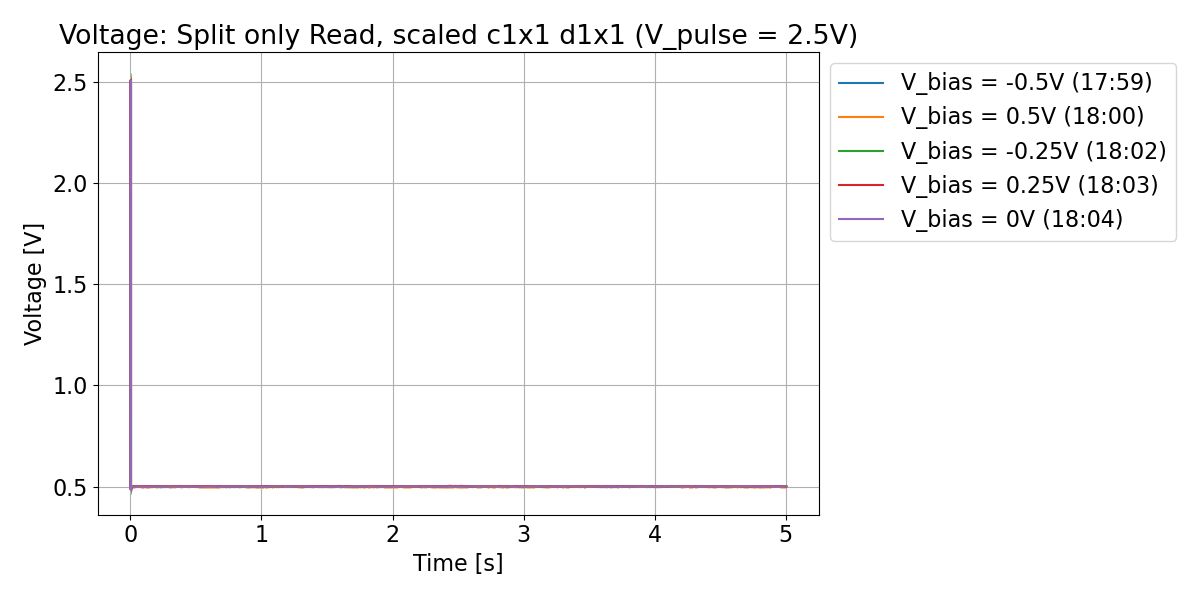

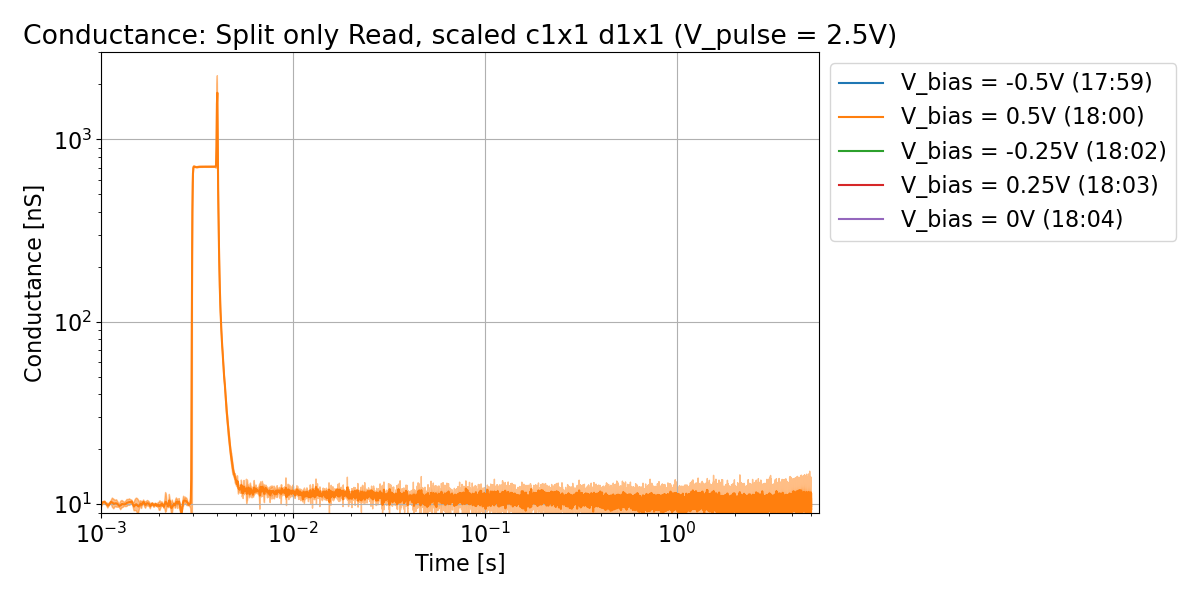

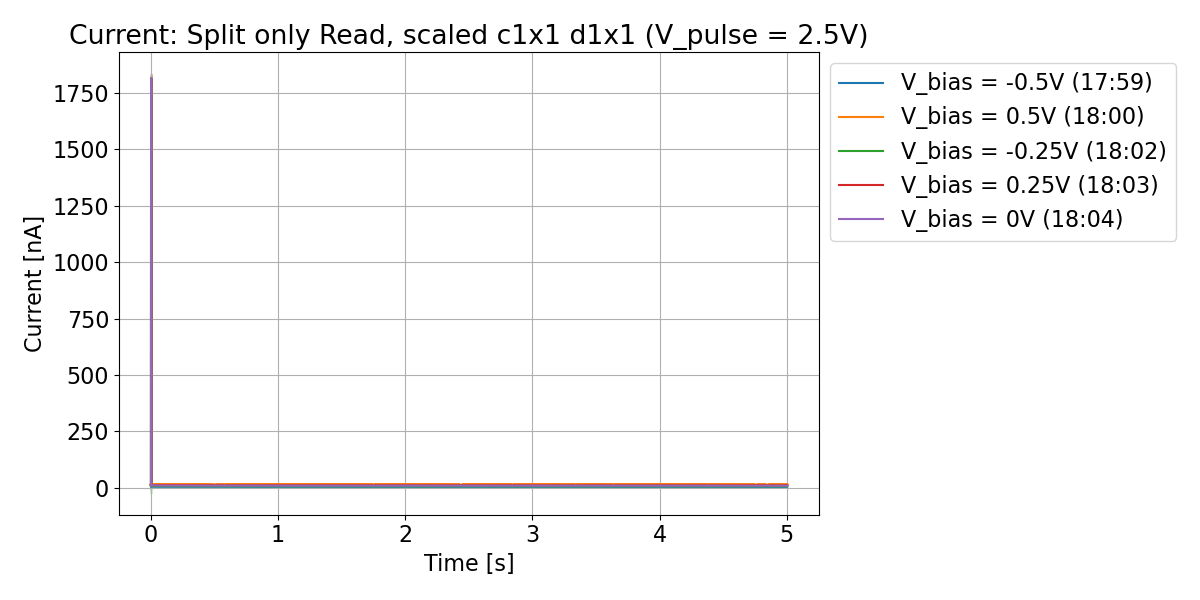

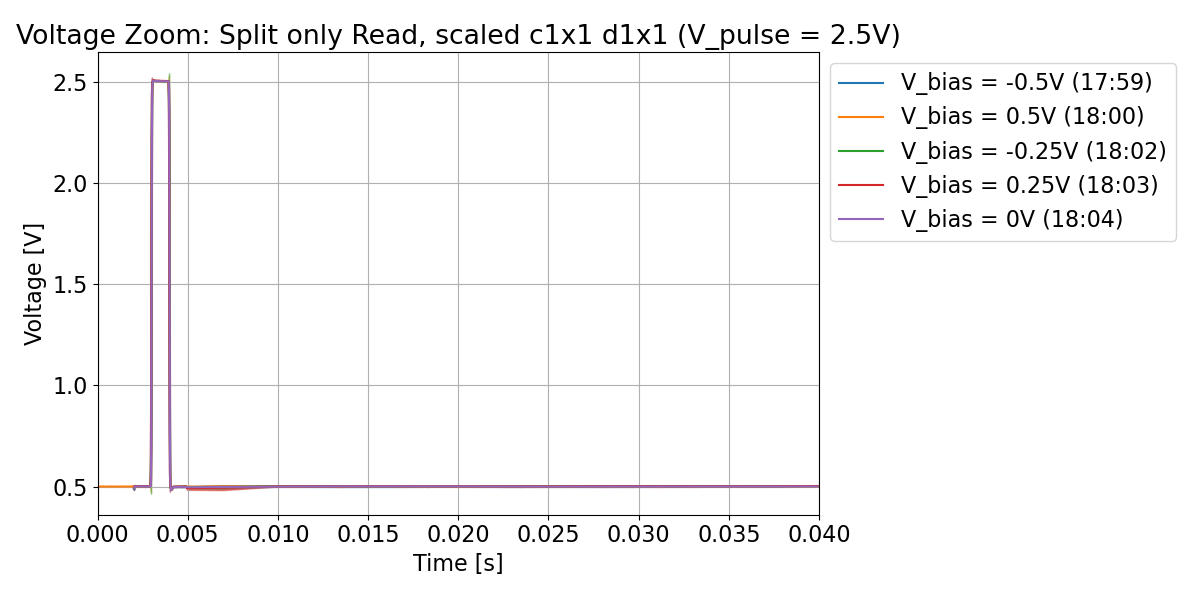

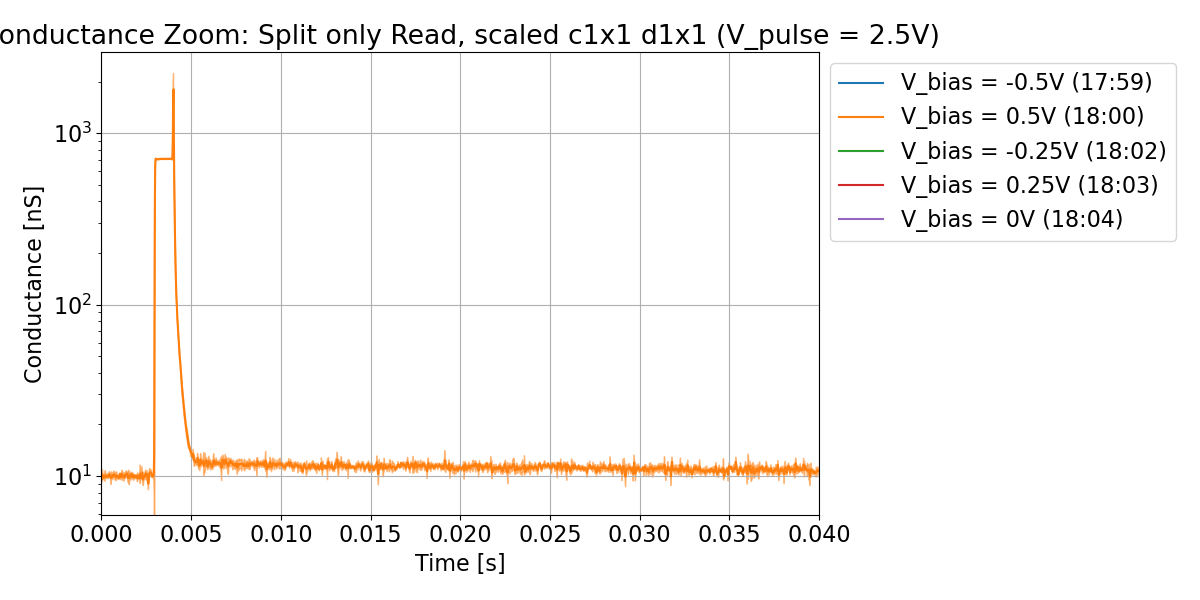

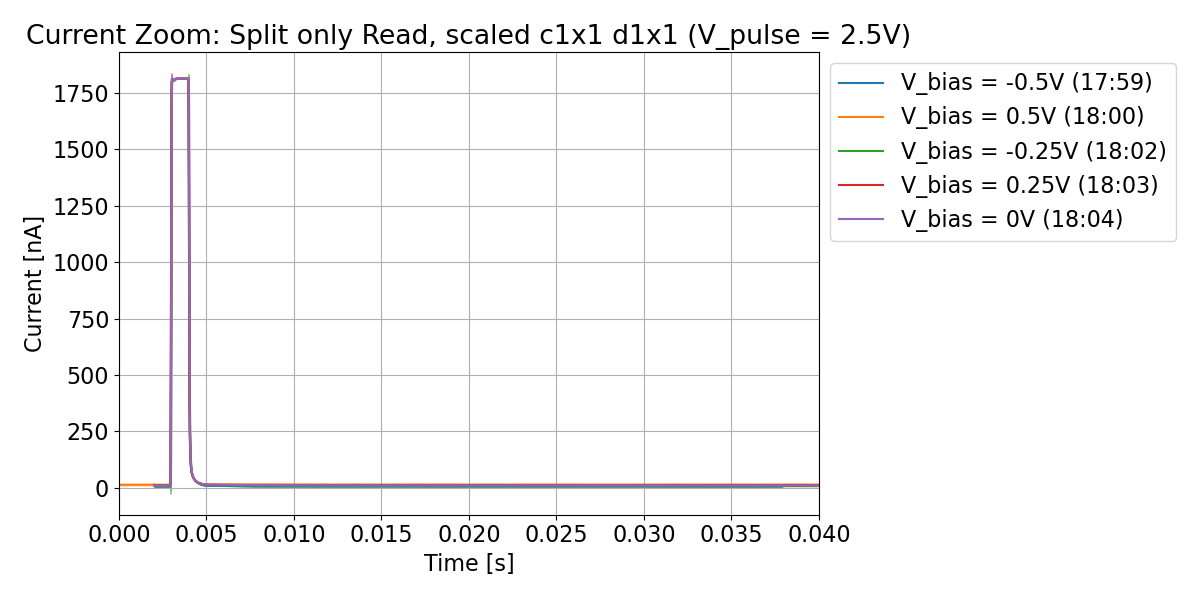

In [149]:
plt.close('all')

figures = []
figure_names = []
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    for spec in figure_specs:
        figsize_labelled = list(figsize)
        figsize_labelled[0] = figsize[0] * (1+figsize_factor*int(legend_pos == 'outside'))
        if spec['no_labels']:
            fig, axs = plt.subplots(1,1, figsize=figsize)
        else:
            fig, axs = plt.subplots(1,1, figsize=figsize_labelled)
        
        for i, (id_mean, id_std) in enumerate(zip(selection_means, selection_stds)):
            m_mean = an.measurements[id_mean]
            data_mean = m_mean['data'].iloc[::interleave]      
            x = data_mean[spec['x_axis']]
            y = data_mean[spec['y_axis']]
            m_std = an.measurements[id_std]
            data_std = m_std['data'].iloc[::interleave]
            y_err = data_std[spec['y_axis']]
            if 'abs' in spec and spec['abs']:
                y = y.abs()
            if spec['xlim'].size:
                mask = (x >= spec['xlim'][0]) & (x <= spec['xlim'][1])
                x = x[mask]
                y = y[mask]
                y_err = y_err[mask]
    
            color = color_map(cmap, i)
            if max_legend_entries is None or i < max_legend_entries:
                label = _parse_template(m_mean, spec['legend_template'])
            else:
                label = '_no_label_'
            y_factor = spec['yfactor']
        
            if 'errorbar_plot' in spec and spec['errorbar_plot']:
                axs.errorbar(x, y*y_factor, yerr=y_err*y_factor, color=color, label=label);
            else:
                axs.plot(x, y*y_factor, color=color, linestyle=linestyle_map[i], label=label)
                axs.fill_between(x, (y-y_err)*y_factor, (y+y_err)*y_factor, color=color, alpha=0.5, label='_no_label_')


        axs.set_xscale(spec['xscale'])
        axs.set_yscale(spec['yscale'])

        if spec['xlim'].size:
            axs.set_xlim(tuple(spec['xlim']))
        if spec['ylim'].size:
            axs.set_ylim(tuple(spec['ylim'] * y_factor))


        name = _parse_template(an.measurements[plot_selection[0][0]], spec['title'])
        figure_names.append(name)
        if not spec['no_labels']:
            legend_kwargs = {}
            if legend_pos == 'outside':
                legend_kwargs['bbox_to_anchor'] = (1,1)
                legend_kwargs['loc'] = 'upper left'
            else:
                legend_kwargs['loc'] = legend_pos
            
            if legend_labels:
                if 'errorbar_plot' in spec and spec['errorbar_plot']:
                    pass
                else:
                    legend_labels = sum([[l, '_no_label_'] for l in legend_labels], [])
                axs.legend(legend_labels, **legend_kwargs)
            else:
                axs.legend(**legend_kwargs)
            
            axs.set_xlabel(spec['x_axis'] + ' ' + units[spec['x_axis']])
            axs.set_ylabel(spec['y_axis'] + ' ' + units[spec['y_axis']])
            axs.set_title(name)
            axs.grid()

        
       
        
        fig.tight_layout()
        figures.append(fig)

### Save figures 

In [161]:
savenames = figure_names
subdirectory = 'clean'
save_figures(figures, figure_specs, savenames, directory, subdirectory=subdirectory, filetype='pdf')

/baltic/users/optolabdata/Experiments/ChristophWeilenmann/2024-08-20_cleansweep_8_first_pulses/clean/Voltage_Split_only_Read__scaled_c1x1_d1x1_V_pulse_=_3_5V
Should file be overwritten: yes[y] / no [n] / no to all [nn] / yes to all [yy] / rename [r] / rename all [rr]:


KeyboardInterrupt: Interrupted by user

### Pick Points 0.6V

In [ ]:
# act_on_selections = 'split_selections'

In [ ]:
# if not 'triggered_selections' in an.manipulated_selections:
#     an.manipulated_selections['triggered_selections'] = {}
    
# skip_known = False

In [ ]:
# chosen_triggered_sel = 0
# appendix = 'pick_t'

# selection_pick_t = []
# for i, sel in enumerate(an.manipulated_selections['triggered_selections'][chosen_triggered_sel]):
#     if i == 0:
#         continue
#     timestamps = an.measurements[sel]['data']['Time']
#     idx_0_6 = an.manipulated_selections[act_on_selections][6][i]
#     m = copy.deepcopy(an.measurements[idx_0_6])
#     data_0_6 = m['data']
#     merged_df = pd.merge_asof(timestamps, data_0_6, on='Time', direction='nearest')
#     m['data'] = merged_df
#     new_idx_0_6 = f'{idx_0_6}_{appendix}'
#     print(new_idx_0_6)
#     an.measurements[new_idx_0_6] = m
#     selection_pick_t.append(new_idx_0_6)
    
# an.manipulated_selections['triggered_selections'][6] = selection_pick_t